# Belief in Supernatural Evil and Attitudes towards Guns
In this assignment we did explore how the belief in supernatural evil has any relationship with the guns<br/>
Marina Samprovalaki p3180234 <br />
Department of Computer Science <br />
Athens University of Economics and Business <br />
p3180234@aueb.gr <br />

### Q1: Belief in Supernatural Evil Metric

In the first task we had to investigate how the answers to three questions about the belief in Devil,Hell and Satan can be combined to a single metric called Supernatural Evil.

#### Obtain the Data

Firstly, we have to import the libraries we are gonna use. 
Sklearn is the most useful and robust library for machine learning in Python. Numpy offers comprehensive mathematical functions, random number generators, linear algebra routines and more. In addition, Pandas used for data manipulation and analysis and is a very powerful tool in our hands. Last but not least, the Seaborn library is used for data visualization and plotting,just like Matplotlib.

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

The dataset that we are going to use can be found on https://www.thearda.com/Archive/Files/Downloads/BRS2014_DL2.asp.</br>
We have to download the xml file where the data is located and also the txt file which explains where the questions are located and has frequencies and percentages. </br>
It's important to be mentioned that we converted the xml file to csv file because we had some issues while I was using Pandas on the initial format.

In [2]:
dataset=pd.read_csv("full_dataset.csv")
dataset.head()

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,20086.69661,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,26218.57317,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,ND,41408.88989,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,50023.02736,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,IA,230734.42840,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0


From our main dataset, we have to create a dataframe with the variables that we are gonna use for the Q1, Satan,Hell and Demons. We will also use an ID variable. The txt file helped us to find which cell belongs to which variable. So Q23A is Devil,Q23C is Hell and Q23G is Demons

In [3]:
col_list = ["MOTHERLODE_ID","Q23A", "Q23C","Q23G"]
df = dataset[col_list]
print(df)

      MOTHERLODE_ID  Q23A  Q23C  Q23G
0         128170892   4.0   4.0   4.0
1         128170893   4.0   4.0   4.0
2         128170894   3.0   2.0   2.0
3         128170895   4.0   4.0   4.0
4         128170896   4.0   4.0   4.0
...             ...   ...   ...   ...
1567      128172920   4.0   2.0   4.0
1568      128172921   3.0   3.0   3.0
1569      128172922   4.0   4.0   3.0
1570      128172335   3.0   3.0   3.0
1571      128172923   NaN   NaN   NaN

[1572 rows x 4 columns]


Making our life easier and renaming the cells

In [4]:
df = df.rename(columns={"Q23A": "Devil", "Q23C": "Hell", "Q23G":"Demons"})
df.head()

,MOTHERLODE_ID,Devil,Hell,Demons
0,128170892,4.0,4.0,4.0
1,128170893,4.0,4.0,4.0
2,128170894,3.0,2.0,2.0
3,128170895,4.0,4.0,4.0
4,128170896,4.0,4.0,4.0


We have to check if there is any NaN values in our dataset anf if there are, we jave to drop them.

In [5]:
df.isna().sum()

MOTHERLODE_ID     0
Devil            68
Hell             73
Demons           80
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

MOTHERLODE_ID    0
Devil            0
Hell             0
Demons           0
dtype: int64

According to the Paper in https://www.sciencedirect.com/science/article/pii/S0049089X21000727?via%3Dihub#appsec2, we know that response categories for each item were as follows: 4 = absolutely, 3 = probably, 2 = probably not, and 1 = definitely not. </br>
Responses to the three items were summed and then averaged across the number of items answered to create an index measuring the strength of belief in supernatural evil. This index ranges from 1 to 4 with a mean of 3.09 (alpha = .94), indicating significant levels of overall belief in supernatural evil among the BRS respondents.

In [8]:
df['SupernaturalEvilMetric'] = (df['Devil']+df['Hell']+df['Demons']).div(3)
df

,MOTHERLODE_ID,Devil,Hell,Demons,SupernaturalEvilMetric
0,128170892,4.0,4.0,4.0,4.000000
1,128170893,4.0,4.0,4.0,4.000000
2,128170894,3.0,2.0,2.0,2.333333
3,128170895,4.0,4.0,4.0,4.000000
4,128170896,4.0,4.0,4.0,4.000000
...,...,...,...,...,...
1566,128172919,3.0,3.0,3.0,3.000000
1567,128172920,4.0,2.0,4.0,3.333333
1568,128172921,3.0,3.0,3.0,3.000000
1569,128172922,4.0,4.0,3.0,3.666667


We want to find the correlation of these 3 variables to make sure that they have a strong relationship or not

In [9]:
df[["Devil","Hell","Demons","SupernaturalEvilMetric"]].corr()

,Devil,Hell,Demons,SupernaturalEvilMetric
Devil,1.000000,0.886280,0.858045,0.963403
Hell,0.886280,1.000000,0.812777,0.947701
Demons,0.858045,0.812777,1.000000,0.937439
SupernaturalEvilMetric,0.963403,0.947701,0.937439,1.000000


We ended up with correlation between 0.93 and 0.96. </br>
The correlation in the Paper is 0.93 and 0.97

We will use the describe function to find statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. We found the mean value of each variable and also the std value

In [10]:
df.describe()

,MOTHERLODE_ID,Devil,Hell,Demons,SupernaturalEvilMetric
count,1.474000e+03,1474.000000,1474.000000,1474.000000,1474.000000
mean,1.281718e+08,3.139077,3.084803,3.016961,3.080280
std,5.877908e+02,1.111713,1.115952,1.109906,1.056362
min,1.281709e+08,1.000000,1.000000,1.000000,1.000000
25%,1.281713e+08,2.000000,2.000000,2.000000,2.333333
50%,1.281717e+08,4.000000,4.000000,3.000000,3.666667
75%,1.281722e+08,4.000000,4.000000,4.000000,4.000000
max,1.281729e+08,4.000000,4.000000,4.000000,4.000000


We are ending up with a table with all the details that we want to know about these variables

## Q2: Variables Selection

We are going to isolate the Dependent Variables from our dataset. We followed the same procedure like we did before, we searched for the columns in the csv and we created the new dataset

In [11]:
dependent_list = ['Q73A','Q73E','Q73G','Q73H','Q73C','Q73F','Q73B','Q73D']
dependent_df = dataset[dependent_list]
dependent_df

,Q73A,Q73E,Q73G,Q73H,Q73C,Q73F,Q73B,Q73D
0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
4,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
1567,NaN,1.0,NaN,2.0,1.0,NaN,NaN,1.0
1568,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
1569,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0
1570,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0


Renaming the columns

In [12]:
dependent_df = dependent_df.rename(columns={"Q73A": "Ban on Semi-Auto Guns", "Q73E": "Ban on High-Capacity Ammo Clips", 
                                            "Q73G":"Banning Civilian Handguns", "Q73H":"Support for Concealed Carry Laws",
                                           "Q73C":"More Armed Security at Schools", "Q73F":"More Teachers/Faculty having Guns",
                                           "Q73B":"More Gun Safety Programs","Q73D":"Expanded Mental Health Screening"})
dependent_df.head()

,Ban on Semi-Auto Guns,Ban on High-Capacity Ammo Clips,Banning Civilian Handguns,Support for Concealed Carry Laws,More Armed Security at Schools,More Teachers/Faculty having Guns,More Gun Safety Programs,Expanded Mental Health Screening
0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
4,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0


We have to replace the values in the columns with 1 and 0 because we know that the range in these variables is 0-1. </br>
In order to do that, we have to subtrack 2-1=1 and 1-1=0.

In [13]:
dependent_df = dependent_df.sub(1)
dependent_df

,Ban on Semi-Auto Guns,Ban on High-Capacity Ammo Clips,Banning Civilian Handguns,Support for Concealed Carry Laws,More Armed Security at Schools,More Teachers/Faculty having Guns,More Gun Safety Programs,Expanded Mental Health Screening
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1567,NaN,0.0,NaN,1.0,0.0,NaN,NaN,0.0
1568,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1569,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1570,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


We want to find the mean value of each variable, so we are gonna use the describe function

In [14]:
dependent_df.describe().loc['mean']

Ban on Semi-Auto Guns                0.370839
Ban on High-Capacity Ammo Clips      0.328895
Banning Civilian Handguns            0.709527
Support for Concealed Carry Laws     0.442077
More Armed Security at Schools       0.378146
More Teachers/Faculty having Guns    0.705452
More Gun Safety Programs             0.072607
Expanded Mental Health Screening     0.091931
Name: mean, dtype: float64

We did check the Appendix A. Descriptive Statistics from the Paper to validate the results. 

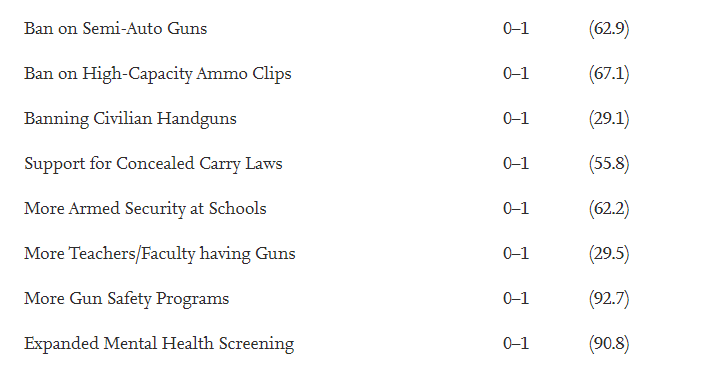

#### Focal Variable

We know that focal variable is the belief in supernatural evil and we want to find the mean and std values.

In [15]:
focal_var = df['SupernaturalEvilMetric']
focal_var

0       4.000000
1       4.000000
2       2.333333
3       4.000000
4       4.000000
          ...   
1566    3.000000
1567    3.333333
1568    3.000000
1569    3.666667
1570    3.000000
Name: SupernaturalEvilMetric, Length: 1474, dtype: float64

In [16]:
focal_var = focal_var.describe().loc[['mean','std']]
focal_var

mean    3.080280
std     1.056362
Name: SupernaturalEvilMetric, dtype: float64

We did check the Appendix A. Descriptive Statistics from the Paper to validate the results. 

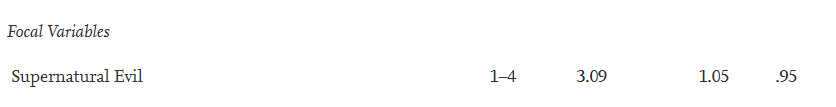

#### Biblical
According to txt file, Biblical informatoin can be found in Q17. SO we have to create a dataframe with Q17 and an ID

In [17]:
religious_list = ["MOTHERLODE_ID",'Q17']
religious_df = dataset[religious_list]
religious_df

,MOTHERLODE_ID,Q17
0,128170892,1.0
1,128170893,1.0
2,128170894,2.0
3,128170895,2.0
4,128170896,1.0
...,...,...
1567,128172920,1.0
1568,128172921,2.0
1569,128172922,2.0
1570,128172335,2.0


We have to check for NaN values and drop them

In [18]:
religious_df.isna().sum()

MOTHERLODE_ID     0
Q17              23
dtype: int64

In [19]:
religious_df.dropna(inplace=True)

C:\Users\Μαρίνα Σαμ\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
religious_df.isna().sum()

MOTHERLODE_ID    0
Q17              0
dtype: int64

There is a problem with Q17. In the Paper the Biblical Inerrancy and the Biblical Literalism are seperated, while Q17 contains both of them. Q17 also includes more categories, so we have to create a dictionary to map each value on each category.

In [21]:
dictionary = {
    1: "Biblical Literalism" , 
    2: "Biblical Inerrancy",
    3: "Human Error",
    4: "Human Error",
    8: "Human Error"
}

In [22]:
religious_df = religious_df["Q17"].map(dictionary)
religious_df

0       Biblical Literalism
1       Biblical Literalism
2        Biblical Inerrancy
3        Biblical Inerrancy
4       Biblical Literalism
               ...         
1566     Biblical Inerrancy
1567    Biblical Literalism
1568     Biblical Inerrancy
1569     Biblical Inerrancy
1570     Biblical Inerrancy
Name: Q17, Length: 1549, dtype: object

Now we are using the dummies to convert categorical variable into dummy/indicator variables.

In [23]:
religious_dummies = pd.get_dummies(religious_df)
religious_dummies

,Biblical Inerrancy,Biblical Literalism,Human Error
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
1566,1,0,0
1567,0,1,0
1568,1,0,0
1569,1,0,0


#### Attendance
According to txt file, information about attendance is located in Q4. We added this information to our dummy table

In [24]:
religious_dummies["Attendance"] = dataset["Q4"].copy()
religious_dummies

,Biblical Inerrancy,Biblical Literalism,Human Error,Attendance
0,0,1,0,8.0
1,0,1,0,1.0
2,1,0,0,7.0
3,1,0,0,6.0
4,0,1,0,8.0
...,...,...,...,...
1566,1,0,0,3.0
1567,0,1,0,1.0
1568,1,0,0,0.0
1569,1,0,0,7.0


We want the mean and std values of Attendance, so we will use the describe function.

In [25]:
religious_dummies.describe()["Attendance"].loc[["mean","std"]]

mean    3.670358
std     2.933554
Name: Attendance, dtype: float64

We will do the same thing for each variable on Q17

In [26]:
literar_mean = religious_dummies["Biblical Literalism"].describe().loc["mean"]
literar_mean

0.22918011620400258

In [27]:
inner_mean = religious_dummies["Biblical Inerrancy"].describe().loc["mean"]
inner_mean

0.3382827630729503

In [28]:
error_mean = religious_dummies["Human Error"].describe().loc["mean"]
error_mean

0.4325371207230471

In [29]:
human_error_mean = religious_dummies["Human Error"].describe().loc["mean"]
human_error_mean

0.4325371207230471

We have to check the Appendix A. Descriptive Statistics from the Paper to chech if the results are right.

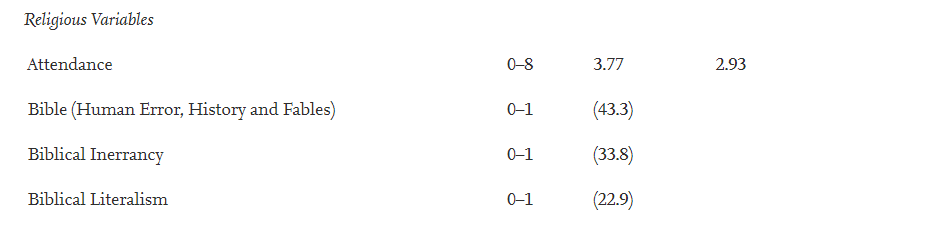

The next thing is to create a dataframe for the Religious Affiliation, RELTRAD as it is written in txt file

In [30]:
aff_df = dataset['RELTRAD']
aff_df.head()

0    1.0
1    3.0
2    2.0
3    2.0
4    1.0
Name: RELTRAD, dtype: float64

In [31]:
aff_df.isna().sum()

91

In [32]:
aff_df.dropna(inplace=True)

In [33]:
aff_df.isna().sum()

0

In [34]:
aff_df.describe()

count    1481.000000
mean        3.312627
std         2.096692
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: RELTRAD, dtype: float64

We will do the same thing with the dictionary we did above.

In [35]:
aff_df = aff_df.map({1.0: "Evangelical Protestant", 2.0: "Mainline Protestant", 3.0:"Black Protestant",
                                         4.0: "Catholic", 5.0:"Other", 6.0:"Other",7.0:"Other"})

In [36]:
aff_df

0       Evangelical Protestant
1             Black Protestant
2          Mainline Protestant
3          Mainline Protestant
4       Evangelical Protestant
                 ...          
1567                  Catholic
1568                  Catholic
1569                     Other
1570                  Catholic
1571                  Catholic
Name: RELTRAD, Length: 1481, dtype: object

Now we are using the dummies to convert categorical variable into dummy/indicator variables again

In [37]:
aff_dummies = pd.get_dummies(aff_df)
aff_dummies

,Black Protestant,Catholic,Evangelical Protestant,Mainline Protestant,Other
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
1567,0,1,0,0,0
1568,0,1,0,0,0
1569,0,0,0,0,1
1570,0,1,0,0,0


We want the mean and std value of each variable, so we will use the describe function.

In [38]:
evanProt = aff_dummies["Evangelical Protestant"].describe().loc['mean'] #Evangelical Protestant
evanProt

0.28426738690074277

In [39]:
aff_dummies["Evangelical Protestant"].unique()

array([1, 0], dtype=uint8)

In [40]:
mainlineProt = aff_dummies["Mainline Protestant"].describe().loc['mean'] #Mainline Protestant
mainlineProt

0.1688048615800135

In [41]:
aff_dummies["Mainline Protestant"].unique()

array([0, 1], dtype=uint8)

In [42]:
blackProt = aff_dummies["Black Protestant"].describe().loc['mean'] #black
blackProt

0.07157326130992572

In [43]:
aff_dummies["Black Protestant"].unique()

array([0, 1], dtype=uint8)

In [44]:
catholic = aff_dummies["Catholic"].describe().loc['mean'] #catholical
catholic

0.24915597569209993

In [45]:
aff_dummies["Catholic"].unique()

array([0, 1], dtype=uint8)

In [46]:
other = aff_dummies["Other"].describe().loc['mean'] #other 5,6,7
other

0.2261985145172181

In [47]:
aff_dummies["Other"].unique()

array([0, 1], dtype=uint8)

We have to check the Appendix A. Descriptive Statistics from the Paper to chech if the results are right.

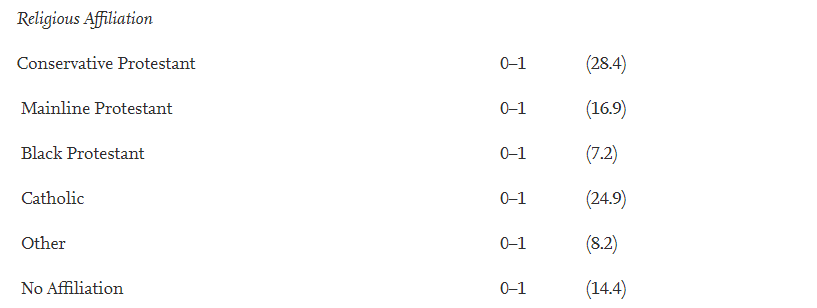

Now it's time to create a dataframe for the Mediator aka Political Ideology. Information is in Q31

In [48]:
politicIdeol = dataset['Q31']
politicIdeol

0       1.0
1       4.0
2       6.0
3       2.0
4       2.0
       ... 
1567    3.0
1568    4.0
1569    4.0
1570    6.0
1571    NaN
Name: Q31, Length: 1572, dtype: float64

Searching for NaN values and dropping them

In [49]:
politicIdeol.isna().sum()

51

In [50]:
politicIdeol.dropna(inplace=True)

In [51]:
politicIdeol.isna().sum()

0

We want the mean and std values so we have to use the describe function

In [52]:
politicIdeol.describe().loc[["mean","std"]]

mean    3.800789
std     1.554416
Name: Q31, dtype: float64

Range Validation

In [53]:
politicIdeol.unique()

array([1., 4., 6., 2., 3., 7., 5.])

We have to check the Appendix A. Descriptive Statistics from the Paper to chech if the results are right.

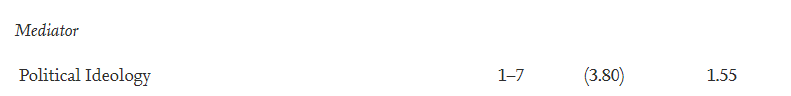

#### Control Variables
Now we have to create a dataframe for the Control Variables

In [54]:
control_df = dataset[["MOTHERLODE_ID","AGE","Q77","Q88A","Q89","Q88B","Q88F","Q90","Q95","Q51A","Q93","Q93_NONE","Q80","STATE"]]
control_df

,MOTHERLODE_ID,AGE,Q77,Q88A,Q89,Q88B,Q88F,Q90,Q95,Q51A,Q93,Q93_NONE,Q80,STATE
0,128170892,85,2.0,NaN,1.0,NaN,NaN,6.0,2.0,5.0,NaN,1.0,4.0,TX
1,128170893,0,2.0,2.0,NaN,1.0,NaN,4.0,1.0,5.0,2.0,NaN,1.0,TX
2,128170894,67,2.0,1.0,1.0,2.0,2.0,4.0,3.0,1.0,NaN,NaN,3.0,ND
3,128170895,64,2.0,1.0,NaN,2.0,2.0,5.0,2.0,5.0,NaN,NaN,2.0,TX
4,128170896,54,1.0,1.0,NaN,2.0,2.0,3.0,5.0,2.0,2.0,NaN,1.0,IA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,2.0,NaN,2.0,NaN,NaN,6.0,5.0,2.0,NaN,1.0,3.0,CA
1568,128172921,59,2.0,NaN,5.0,NaN,NaN,3.0,4.0,2.0,1.0,NaN,1.0,CA
1569,128172922,29,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,NaN,NaN,3.0,CA
1570,128172335,57,1.0,NaN,3.0,NaN,NaN,6.0,5.0,3.0,0.0,1.0,1.0,CT


Renaming the columns once again

In [55]:
control_df = control_df.rename(columns={"Q77": "Gender", "Q88A": "White", "Q88B":"African American", "Q88F":"Other Race", 
                                  "Q90":"Education", "Q51A":"Marital",
                                  "Q93":"Children Under 18","Q80":"Area"})
control_df.head()

,MOTHERLODE_ID,AGE,Gender,White,Q89,African American,Other Race,Education,Q95,Marital,Children Under 18,Q93_NONE,Area,STATE
0,128170892,85,2.0,NaN,1.0,NaN,NaN,6.0,2.0,5.0,NaN,1.0,4.0,TX
1,128170893,0,2.0,2.0,NaN,1.0,NaN,4.0,1.0,5.0,2.0,NaN,1.0,TX
2,128170894,67,2.0,1.0,1.0,2.0,2.0,4.0,3.0,1.0,NaN,NaN,3.0,ND
3,128170895,64,2.0,1.0,NaN,2.0,2.0,5.0,2.0,5.0,NaN,NaN,2.0,TX
4,128170896,54,1.0,1.0,NaN,2.0,2.0,3.0,5.0,2.0,2.0,NaN,1.0,IA


In [56]:
control_df["AGE"].mean()

49.162213740458014

#### Gender
Dataset has a column called Gender. That column consist 2 and 1. </br>
2 is for Female and 1 is for Male. So we have to map these values with the appropriate gender. We will use 1 for Male and 2 for Female.
P.S Gender is not just male or female 🤨

In [57]:
control_df["Male"] = control_df["Gender"].map({1:1,2:0})
control_df["Female"] = control_df["Gender"].map({1:0,2:1})
control_df

,MOTHERLODE_ID,AGE,Gender,White,Q89,African American,Other Race,Education,Q95,Marital,Children Under 18,Q93_NONE,Area,STATE,Male,Female
0,128170892,85,2.0,NaN,1.0,NaN,NaN,6.0,2.0,5.0,NaN,1.0,4.0,TX,0.0,1.0
1,128170893,0,2.0,2.0,NaN,1.0,NaN,4.0,1.0,5.0,2.0,NaN,1.0,TX,0.0,1.0
2,128170894,67,2.0,1.0,1.0,2.0,2.0,4.0,3.0,1.0,NaN,NaN,3.0,ND,0.0,1.0
3,128170895,64,2.0,1.0,NaN,2.0,2.0,5.0,2.0,5.0,NaN,NaN,2.0,TX,0.0,1.0
4,128170896,54,1.0,1.0,NaN,2.0,2.0,3.0,5.0,2.0,2.0,NaN,1.0,IA,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,2.0,NaN,2.0,NaN,NaN,6.0,5.0,2.0,NaN,1.0,3.0,CA,0.0,1.0
1568,128172921,59,2.0,NaN,5.0,NaN,NaN,3.0,4.0,2.0,1.0,NaN,1.0,CA,0.0,1.0
1569,128172922,29,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,NaN,NaN,3.0,CA,0.0,1.0
1570,128172335,57,1.0,NaN,3.0,NaN,NaN,6.0,5.0,3.0,0.0,1.0,1.0,CT,1.0,0.0


In [58]:
control_df["Male"].mean()

0.4212239583333333

In [59]:
control_df["Female"].mean()

0.5787760416666666

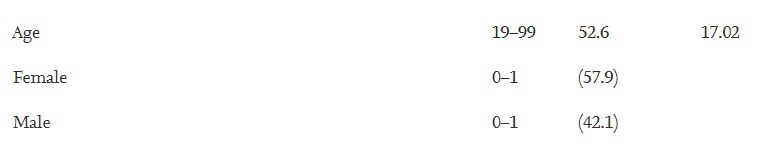

#### Race
As for the race, White,African American and Other already exist in our main dataset as columns. The only thing we have to do is mapping the values to the appropriate category. White people are mapping with 1 in their specific column. Also African American and Other too.

In [60]:
control_df["White"] = control_df["White"].map({1:1,2:0})
control_df["Black"] = control_df["African American"].map({1:1,2:0})
control_df["Other"] = control_df["Other Race"].map({1:1,2:0})
control_df = control_df.drop('African American', axis=1)
control_df

,MOTHERLODE_ID,AGE,Gender,White,Q89,Other Race,Education,Q95,Marital,Children Under 18,Q93_NONE,Area,STATE,Male,Female,Black,Other
0,128170892,85,2.0,NaN,1.0,NaN,6.0,2.0,5.0,NaN,1.0,4.0,TX,0.0,1.0,NaN,NaN
1,128170893,0,2.0,0.0,NaN,NaN,4.0,1.0,5.0,2.0,NaN,1.0,TX,0.0,1.0,1.0,NaN
2,128170894,67,2.0,1.0,1.0,2.0,4.0,3.0,1.0,NaN,NaN,3.0,ND,0.0,1.0,0.0,0.0
3,128170895,64,2.0,1.0,NaN,2.0,5.0,2.0,5.0,NaN,NaN,2.0,TX,0.0,1.0,0.0,0.0
4,128170896,54,1.0,1.0,NaN,2.0,3.0,5.0,2.0,2.0,NaN,1.0,IA,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,2.0,NaN,2.0,NaN,6.0,5.0,2.0,NaN,1.0,3.0,CA,0.0,1.0,NaN,NaN
1568,128172921,59,2.0,NaN,5.0,NaN,3.0,4.0,2.0,1.0,NaN,1.0,CA,0.0,1.0,NaN,NaN
1569,128172922,29,2.0,0.0,2.0,2.0,4.0,2.0,1.0,NaN,NaN,3.0,CA,0.0,1.0,0.0,0.0
1570,128172335,57,1.0,NaN,3.0,NaN,6.0,5.0,3.0,0.0,1.0,1.0,CT,1.0,0.0,NaN,NaN


In [61]:
control_df["White"].describe().loc["mean"]

0.9002302379125096

In [62]:
control_df["Black"].describe().loc["mean"] #African-America

0.21776155717761558

In [63]:
control_df["Other"].describe().loc["mean"] #African-America

0.08630952380952381

#### Hispanic
The next thing is Q89 which asks if somebody is Hispanic or Latino. If there is a Hispanic or a Latino, the mapping value is 1. If there is not, we choose 0

In [64]:
control_df["Hispanic"] = control_df["Q89"].map ({1:0,2:1,3:1,4:1,5:2,8:0})
control_df = control_df.drop('Q89', axis=1)
control_df

,MOTHERLODE_ID,AGE,Gender,White,Other Race,Education,Q95,Marital,Children Under 18,Q93_NONE,Area,STATE,Male,Female,Black,Other,Hispanic
0,128170892,85,2.0,NaN,NaN,6.0,2.0,5.0,NaN,1.0,4.0,TX,0.0,1.0,NaN,NaN,0.0
1,128170893,0,2.0,0.0,NaN,4.0,1.0,5.0,2.0,NaN,1.0,TX,0.0,1.0,1.0,NaN,NaN
2,128170894,67,2.0,1.0,2.0,4.0,3.0,1.0,NaN,NaN,3.0,ND,0.0,1.0,0.0,0.0,0.0
3,128170895,64,2.0,1.0,2.0,5.0,2.0,5.0,NaN,NaN,2.0,TX,0.0,1.0,0.0,0.0,NaN
4,128170896,54,1.0,1.0,2.0,3.0,5.0,2.0,2.0,NaN,1.0,IA,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,2.0,NaN,NaN,6.0,5.0,2.0,NaN,1.0,3.0,CA,0.0,1.0,NaN,NaN,1.0
1568,128172921,59,2.0,NaN,NaN,3.0,4.0,2.0,1.0,NaN,1.0,CA,0.0,1.0,NaN,NaN,2.0
1569,128172922,29,2.0,0.0,2.0,4.0,2.0,1.0,NaN,NaN,3.0,CA,0.0,1.0,0.0,0.0,1.0
1570,128172335,57,1.0,NaN,NaN,6.0,5.0,3.0,0.0,1.0,1.0,CT,1.0,0.0,NaN,NaN,1.0


In [65]:
control_df["Hispanic"].describe().loc["mean"]

0.24061810154525387

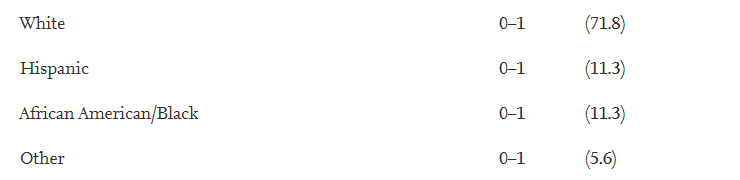

#### Education
As for Education, we know that Education has many levels. We chose to match 1 and 5 with people who have not attended high school, 2 and 3 with people whose level of education stopped in High School and 4 for undergratuated students. Also we chose 6 for people with a college degree and 7 for Post Gratuated.

In [66]:
control_df['Education'] = control_df["Education"].map({1.0:'Less Than HS',2.0:"HS",3.0:"HS",
                          4.0:"College",5.0:"Less Than HS",6.0:"College Graduate",7.0:"Post Graduate"})

We are using dummies to convert categorical variable into dummy/indicator variables again

In [67]:
education_dummies = pd.get_dummies(control_df["Education"])

In [68]:
education_dummies ["MOTHERLODE_ID"] = dataset["MOTHERLODE_ID"]
education_dummies

,College,College Graduate,HS,Less Than HS,Post Graduate,MOTHERLODE_ID
0,0,1,0,0,0,128170892
1,1,0,0,0,0,128170893
2,1,0,0,0,0,128170894
3,0,0,0,1,0,128170895
4,0,0,1,0,0,128170896
...,...,...,...,...,...,...
1567,0,1,0,0,0,128172920
1568,0,0,1,0,0,128172921
1569,1,0,0,0,0,128172922
1570,0,1,0,0,0,128172335


We want the mean value of each variable, so we will use the describe function.

In [69]:
lessthanhs = education_dummies["Less Than HS"].describe().loc["mean"]
lessthanhs

0.09096692111959287

In [70]:
education_dummies["Less Than HS"].unique()

array([0, 1], dtype=uint8)

In [71]:
hs = education_dummies["HS"].describe().loc["mean"]
hs

0.17048346055979643

In [72]:
education_dummies["HS"].unique()

array([0, 1], dtype=uint8)

In [73]:
college = education_dummies["College"].describe().loc["mean"]
college

0.23027989821882952

In [74]:
education_dummies["College"].unique()

array([0, 1], dtype=uint8)

In [75]:
college_degree =  education_dummies["College Graduate"].describe().loc["mean"]
college_degree

0.25

In [76]:
education_dummies["College Graduate"].unique()

array([1, 0], dtype=uint8)

In [77]:
post_graduate = education_dummies["Post Graduate"].describe().loc["mean"]
post_graduate

0.21310432569974555

In [78]:
education_dummies["Post Graduate"].unique()

array([0, 1], dtype=uint8)

We have to check the Appendix A. Descriptive Statistics from the Paper to chech if the results are right.

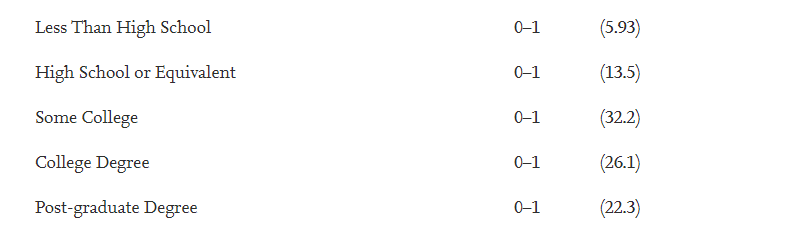

#### Income
The information is located in Q95

In [79]:
control_df = control_df.rename(columns={"Q95": "Income"})
control_df

,MOTHERLODE_ID,AGE,Gender,White,Other Race,Education,Income,Marital,Children Under 18,Q93_NONE,Area,STATE,Male,Female,Black,Other,Hispanic
0,128170892,85,2.0,NaN,NaN,College Graduate,2.0,5.0,NaN,1.0,4.0,TX,0.0,1.0,NaN,NaN,0.0
1,128170893,0,2.0,0.0,NaN,College,1.0,5.0,2.0,NaN,1.0,TX,0.0,1.0,1.0,NaN,NaN
2,128170894,67,2.0,1.0,2.0,College,3.0,1.0,NaN,NaN,3.0,ND,0.0,1.0,0.0,0.0,0.0
3,128170895,64,2.0,1.0,2.0,Less Than HS,2.0,5.0,NaN,NaN,2.0,TX,0.0,1.0,0.0,0.0,NaN
4,128170896,54,1.0,1.0,2.0,HS,5.0,2.0,2.0,NaN,1.0,IA,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,2.0,NaN,NaN,College Graduate,5.0,2.0,NaN,1.0,3.0,CA,0.0,1.0,NaN,NaN,1.0
1568,128172921,59,2.0,NaN,NaN,HS,4.0,2.0,1.0,NaN,1.0,CA,0.0,1.0,NaN,NaN,2.0
1569,128172922,29,2.0,0.0,2.0,College,2.0,1.0,NaN,NaN,3.0,CA,0.0,1.0,0.0,0.0,1.0
1570,128172335,57,1.0,NaN,NaN,College Graduate,5.0,3.0,0.0,1.0,1.0,CT,1.0,0.0,NaN,NaN,1.0


In [80]:
income = control_df["Income"].describe().loc[["mean","std"]]
income

mean    4.151329
std     1.707939
Name: Income, dtype: float64

In [81]:
control_df["Income"].unique()

array([ 2.,  1.,  3.,  5.,  4.,  6.,  7., nan])

We have to check the Appendix A. Descriptive Statistics from the Paper to chech if the results are right.

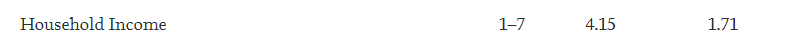

#### Marital
The main dataset has a column called Marital. If a person has a marital,then they are probably married and the mapping value is 1. <br/>
If they are unmarried,the mapping value is 0. The same thing is happening with widowhood or the divorce.

In [82]:
control_df["Married"] = control_df["Marital"].map({1:0,2:1,3:1,4:0,5:0,6:0})
control_df["Unmarried"] = control_df["Marital"].map({1:1,2:0,3:0,4:1,5:1,6:1})
control_df = control_df.drop('Marital', 1)
control_df

C:\Users\DD7D~1\AppData\Local\Temp/ipykernel_12184/1357394537.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  control_df = control_df.drop('Marital', 1)


,MOTHERLODE_ID,AGE,Gender,White,Other Race,Education,Income,Children Under 18,Q93_NONE,Area,STATE,Male,Female,Black,Other,Hispanic,Married,Unmarried
0,128170892,85,2.0,NaN,NaN,College Graduate,2.0,NaN,1.0,4.0,TX,0.0,1.0,NaN,NaN,0.0,0.0,1.0
1,128170893,0,2.0,0.0,NaN,College,1.0,2.0,NaN,1.0,TX,0.0,1.0,1.0,NaN,NaN,0.0,1.0
2,128170894,67,2.0,1.0,2.0,College,3.0,NaN,NaN,3.0,ND,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,128170895,64,2.0,1.0,2.0,Less Than HS,2.0,NaN,NaN,2.0,TX,0.0,1.0,0.0,0.0,NaN,0.0,1.0
4,128170896,54,1.0,1.0,2.0,HS,5.0,2.0,NaN,1.0,IA,1.0,0.0,0.0,0.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,2.0,NaN,NaN,College Graduate,5.0,NaN,1.0,3.0,CA,0.0,1.0,NaN,NaN,1.0,1.0,0.0
1568,128172921,59,2.0,NaN,NaN,HS,4.0,1.0,NaN,1.0,CA,0.0,1.0,NaN,NaN,2.0,1.0,0.0
1569,128172922,29,2.0,0.0,2.0,College,2.0,NaN,NaN,3.0,CA,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1570,128172335,57,1.0,NaN,NaN,College Graduate,5.0,0.0,1.0,1.0,CT,1.0,0.0,NaN,NaN,1.0,1.0,0.0


We want the mean value of each category

In [83]:
unmarried = control_df["Unmarried"].describe().loc["mean"]
unmarried

0.4472329472329472

In [84]:
control_df["Unmarried"].unique()

array([ 1.,  0., nan])

In [85]:
married = control_df["Married"].describe().loc["mean"]
married

0.5527670527670527

In [86]:
control_df["Married"].unique

<bound method Series.unique of 0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1567    1.0
1568    1.0
1569    0.0
1570    1.0
1571    NaN
Name: Married, Length: 1572, dtype: float64>

We have to check the Appendix A. Descriptive Statistics from the Paper to chech if the results are right.

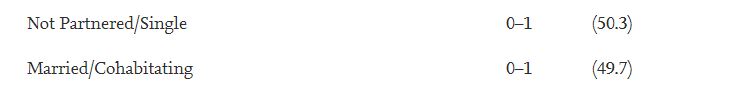

#### Children
The main dataset has more than one fields about children under 18. If somebody has at least a child under 18, the mapping value is 1 and if they have none,the mapping value is 0 

In [87]:
control_df["No Children Under 18"] = control_df["Children Under 18"].map({0:1,1:0,2:0,3:0,4:0,5:0,6:0})
control_df["Children Under 18"] = control_df["Children Under 18"].map({0:0,1:1,2:1,3:1,4:1,5:1,6:1})

At this moment, we faced an issue. The percentages we had found were different than the real results on the Paper. </br>
So we decided to fill the NaN values of the ChildrenUnder18 field where it's information is located in the Q93_NONE column.  However Q93_NONE has 1 if there is no children under 18 and 0 otherwise. We want to map 1 with the case that there is a least a child under 18 in the family. So we have to subtract 1 from each record in Q93_NONE.

In [88]:
control_df["Children Under 18"].isna().sum()

1030

In [89]:
control_df['Q93_NONE'] = control_df['Q93_NONE'].sub(1)

In [90]:
control_df["Children Under 18"].fillna(control_df['Q93_NONE'],inplace=True)
control_df

,MOTHERLODE_ID,AGE,Gender,White,Other Race,Education,Income,Children Under 18,Q93_NONE,Area,STATE,Male,Female,Black,Other,Hispanic,Married,Unmarried,No Children Under 18
0,128170892,85,2.0,NaN,NaN,College Graduate,2.0,0.0,0.0,4.0,TX,0.0,1.0,NaN,NaN,0.0,0.0,1.0,NaN
1,128170893,0,2.0,0.0,NaN,College,1.0,1.0,NaN,1.0,TX,0.0,1.0,1.0,NaN,NaN,0.0,1.0,0.0
2,128170894,67,2.0,1.0,2.0,College,3.0,NaN,NaN,3.0,ND,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
3,128170895,64,2.0,1.0,2.0,Less Than HS,2.0,NaN,NaN,2.0,TX,0.0,1.0,0.0,0.0,NaN,0.0,1.0,NaN
4,128170896,54,1.0,1.0,2.0,HS,5.0,1.0,NaN,1.0,IA,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,2.0,NaN,NaN,College Graduate,5.0,0.0,0.0,3.0,CA,0.0,1.0,NaN,NaN,1.0,1.0,0.0,NaN
1568,128172921,59,2.0,NaN,NaN,HS,4.0,1.0,NaN,1.0,CA,0.0,1.0,NaN,NaN,2.0,1.0,0.0,0.0
1569,128172922,29,2.0,0.0,2.0,College,2.0,NaN,NaN,3.0,CA,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN
1570,128172335,57,1.0,NaN,NaN,College Graduate,5.0,0.0,0.0,1.0,CT,1.0,0.0,NaN,NaN,1.0,1.0,0.0,1.0


In [91]:
control_df['Children Under 18'].isna().sum()

407

Unfortunately, Children Under 18 has NaN values that have not be filled up. So we have to fill them up with 0 since in the research, the most of the people do not have children at all.

In [92]:
control_df['Children Under 18'].fillna(0,inplace=True)

In [93]:
control_df['Children Under 18'].isna().sum()

0

In [94]:
control_df['NoChildrenUnder18'] = control_df['Children Under 18'].map({0:'NoChildren',1:'Children',2:'Children',3:'Children',4:'Children',5:'Children',6:'Children'})

We are using dummies to convert categorical variable into dummy/indicator variables again

In [95]:
children_dummies = pd.get_dummies(control_df['NoChildrenUnder18'])

In [96]:
children_dummies ["MOTHERLODE_ID"] = dataset["MOTHERLODE_ID"]
children_dummies

,Children,NoChildren,MOTHERLODE_ID
0,0,1,128170892
1,1,0,128170893
2,0,1,128170894
3,0,1,128170895
4,1,0,128170896
...,...,...,...
1567,0,1,128172920
1568,1,0,128172921
1569,0,1,128172922
1570,0,1,128172335


In [97]:
children_dummies.describe()

,Children,NoChildren,MOTHERLODE_ID
count,1572.000000,1572.000000,1.572000e+03
mean,0.254453,0.745547,1.281718e+08
std,0.435692,0.435692,5.894006e+02
min,0.000000,0.000000,1.281709e+08
25%,0.000000,0.000000,1.281713e+08
50%,0.000000,1.000000,1.281717e+08
75%,1.000000,1.000000,1.281722e+08
max,1.000000,1.000000,1.281729e+08


In [98]:
children_dummies["Children"].unique()

array([0, 1], dtype=uint8)

In [99]:
children_dummies["NoChildren"].unique()

array([1, 0], dtype=uint8)

We have to check the Appendix A. Descriptive Statistics from the Paper to chech if the results are right.

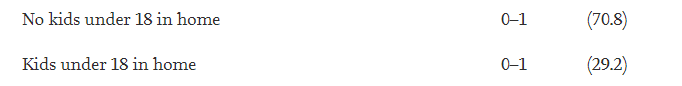

#### Area
Information is located in Q80

In [100]:
control_df["Area"] = control_df["Area"].map({1:"Urban",2:"Urban",3:"Rural",4:"Rural"})
control_df

,MOTHERLODE_ID,AGE,Gender,White,Other Race,Education,Income,Children Under 18,Q93_NONE,Area,STATE,Male,Female,Black,Other,Hispanic,Married,Unmarried,No Children Under 18,NoChildrenUnder18
0,128170892,85,2.0,NaN,NaN,College Graduate,2.0,0.0,0.0,Rural,TX,0.0,1.0,NaN,NaN,0.0,0.0,1.0,NaN,NoChildren
1,128170893,0,2.0,0.0,NaN,College,1.0,1.0,NaN,Urban,TX,0.0,1.0,1.0,NaN,NaN,0.0,1.0,0.0,Children
2,128170894,67,2.0,1.0,2.0,College,3.0,0.0,NaN,Rural,ND,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NoChildren
3,128170895,64,2.0,1.0,2.0,Less Than HS,2.0,0.0,NaN,Urban,TX,0.0,1.0,0.0,0.0,NaN,0.0,1.0,NaN,NoChildren
4,128170896,54,1.0,1.0,2.0,HS,5.0,1.0,NaN,Urban,IA,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,Children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,48,2.0,NaN,NaN,College Graduate,5.0,0.0,0.0,Rural,CA,0.0,1.0,NaN,NaN,1.0,1.0,0.0,NaN,NoChildren
1568,128172921,59,2.0,NaN,NaN,HS,4.0,1.0,NaN,Urban,CA,0.0,1.0,NaN,NaN,2.0,1.0,0.0,0.0,Children
1569,128172922,29,2.0,0.0,2.0,College,2.0,0.0,NaN,Rural,CA,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,NoChildren
1570,128172335,57,1.0,NaN,NaN,College Graduate,5.0,0.0,0.0,Urban,CT,1.0,0.0,NaN,NaN,1.0,1.0,0.0,1.0,NoChildren


We are using dummies to convert categorical variable into dummy/indicator variables again

In [101]:
area_dummies = pd.get_dummies(control_df["Area"])

In [102]:
area_dummies["MOTHERLODE_ID"] = dataset["MOTHERLODE_ID"]

In [103]:
area_dummies

,Rural,Urban,MOTHERLODE_ID
0,1,0,128170892
1,0,1,128170893
2,1,0,128170894
3,0,1,128170895
4,0,1,128170896
...,...,...,...
1567,1,0,128172920
1568,0,1,128172921
1569,1,0,128172922
1570,0,1,128172335


In [104]:
urban_area = area_dummies["Urban"].describe().loc["mean"]
urban_area

0.510178117048346

In [105]:
area_dummies["Urban"].unique()

array([0, 1], dtype=uint8)

In [106]:
rural_area = area_dummies["Rural"].describe().loc["mean"]
rural_area

0.45674300254452926

In [107]:
area_dummies["Rural"].unique()

array([1, 0], dtype=uint8)

We have to check the Appendix A. Descriptive Statistics from the Paper to chech if the results are right.

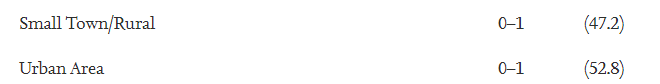

#### States
We have to create a variable for all the states in our dataset.

In [108]:
states = dataset["STATE"]

In order to create a dictionary to map states with numbers, we are going to use 2-letter-state code </br>
If the state is in south side of USA, the mapping value would be 1 and 0 otherwise. </br>
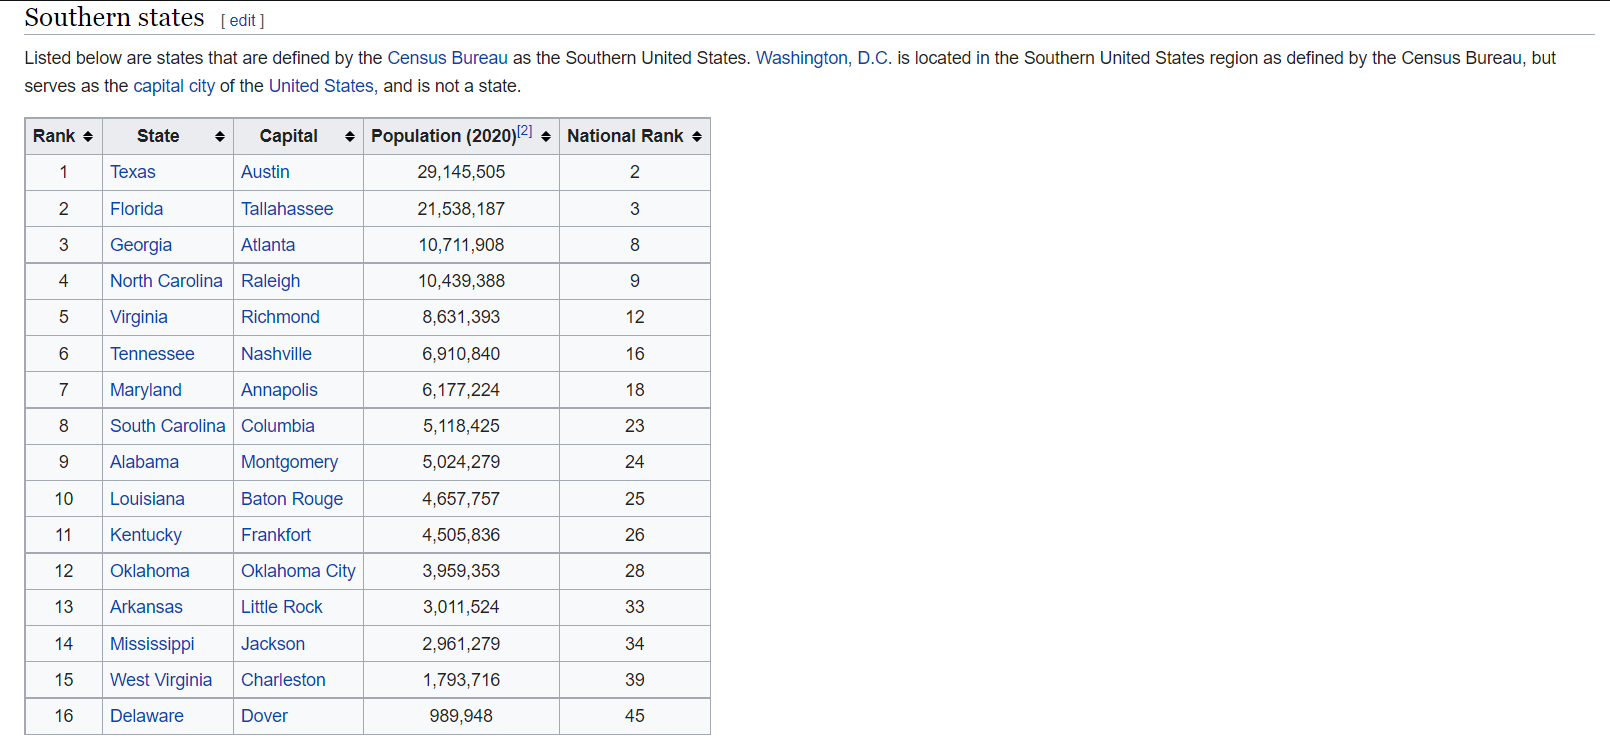
Source: Wikipedia

In [109]:
control_df['South'] = states.map({'TX':1,'FL':1,'GA':1,'NC':1,'VA':1,'TN':1,'MD':1,'SC':1,'AL':1,'LA':1,'KY':1,'OK':1,'AR':1,'MS':1,'WV':1,'DE':1})

In [110]:
#control_df['NoSouthStates'] = states.map({'TX':0,'FL':0,'GA':0,'NC':0,'VA':0,'TN':0,'MD':0,'SC':0,'AL':0,'LA':0,'KY':0,'OK':0,'AR':0,'MS':0,'WV':0,'DE':0})

We have to fill the rest of the states that do not belong in the South Side with 0.

In [111]:
control_df['South'].fillna(0,inplace=True)

In [112]:
#control_df['NoSouthStates'].fillna(1,inplace=True)

In [113]:
south_dummies = pd.get_dummies(control_df["South"])
south_dummies

,0.0,1.0
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1567,1,0
1568,1,0
1569,1,0
1570,1,0


In [114]:
south_dummies.describe()

,0.0,1.0
count,1572.000000,1572.000000
mean,0.617048,0.382952
std,0.486261,0.486261
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


We have to check the Appendix A. Descriptive Statistics from the Paper to chech if the results are right.

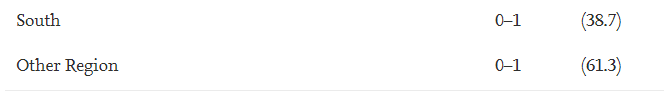

In [115]:
control_df.describe()

,MOTHERLODE_ID,AGE,Gender,White,Other Race,Income,Children Under 18,Q93_NONE,Male,Female,Black,Other,Hispanic,Married,Unmarried,No Children Under 18,South
count,1.572000e+03,1572.000000,1536.000000,1303.000000,672.00000,1467.000000,1572.000000,704.0,1536.000000,1536.000000,822.000000,672.00000,906.000000,1554.000000,1554.000000,542.000000,1572.000000
mean,1.281718e+08,49.162214,1.578776,0.900230,1.91369,4.151329,0.254453,0.0,0.421224,0.578776,0.217762,0.08631,0.240618,0.552767,0.447233,0.261993,0.382952
std,5.894006e+02,21.018613,0.493916,0.299808,0.28103,1.707939,0.435692,0.0,0.493916,0.493916,0.412976,0.28103,0.527210,0.497368,0.497368,0.440125,0.486261
min,1.281709e+08,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.281713e+08,35.000000,1.000000,1.000000,2.00000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.281717e+08,52.000000,2.000000,1.000000,2.00000,5.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.281722e+08,64.000000,2.000000,1.000000,2.00000,5.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.281729e+08,99.000000,2.000000,1.000000,2.00000,7.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000


In the end, we have a table with all variables and all metrics validated with the Paper.

### Q3: Predict Support for Various Gun Policies </br>
In this task, we have to predict support for various gun policies from the metric of supernatural evil, controlling for background variables.

In [116]:
predictor = dataset.copy()

Renaming the columns

In [117]:
predictor = predictor.rename(columns={"Q73A": "BanonSemiAutoGuns", "Q73E": "BanonHighCapacityAmmoClips", 
                                            "Q73G":"BanningCivilianHandguns", "Q73H":"SupportforConcealedCarryLaws","Q73C":"MoreArmedSecurityatSchools", "Q73F":"MoreTeachersFacultyhavingGuns",
                                           "Q73B":"MoreGunSafetyPrograms","Q73D":"ExpandedMentalHealthScreening"})
predictor.head()

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,20086.69661,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,26218.57317,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,ND,41408.88989,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,50023.02736,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,IA,230734.42840,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0


In [118]:
predictor = predictor.rename(columns={"Q4" : "Attendance", "Q17": "Biblical", "RELTRAD" : "RELTRAD","Q31" : "PoliticalIdeology", 
                          "Q89" : "Hispanic", "Q88B": "Black","Q88F": "Other","Q77" : "Gender",
                          "Q90" :"Education","Q95": "Income","Q51A":"Marriage","Q93":"ChildrenUnder18",
                          "Q93_NONE":"NoChildrenUnder18","Q80": "Area","STATE":"South"})

Mapping the variables with the specific values starting from gun policies

In [119]:
predictor["BanonSemiAutoGuns"] = predictor["BanonSemiAutoGuns"].map({1:0,2:1})

In [120]:
predictor["BanonHighCapacityAmmoClips"] = predictor["BanonHighCapacityAmmoClips"].map({1:0,2:1})

In [121]:
predictor["BanningCivilianHandguns"] = predictor["BanningCivilianHandguns"].map({1:0,2:1})

In [122]:
predictor["SupportforConcealedCarryLaws"] = predictor["SupportforConcealedCarryLaws"].map({1:0,2:1})

In [123]:
predictor["MoreArmedSecurityatSchools"] = predictor["MoreArmedSecurityatSchools"].map({1:0,2:1})

In [124]:
predictor["MoreTeachersFacultyhavingGuns"] = predictor["MoreTeachersFacultyhavingGuns"].map({1:0,2:1})

In [125]:
predictor["MoreGunSafetyPrograms"] = predictor["MoreGunSafetyPrograms"].map({1:0,2:1})

In [126]:
predictor["ExpandedMentalHealthScreening"] = predictor["ExpandedMentalHealthScreening"].map({1:0,2:1})

Mapping the rest variables as we did in previous tasks.

In [127]:
predictor['Hispanic'] = predictor['Hispanic'].map({1:0, 2:1,3:1,4:1,5:1,8:0})

In [128]:
predictor['Biblical'] = predictor['Biblical'].map({1:'Biblical_Literalism', 2:'Biblical__Inerrancy',3:'HumanError',4:'HumanError',8:'HumanError'})

In [129]:
predictor['RELTRAD'] = predictor['RELTRAD'].map({1:'Conservatist_Evangelical', 2:'Mainline_Protestant',3:'Black_Protestant',4:'Catholic',5:'Other',6:'Other',7:'No_Affiliation'})

In [130]:
predictor['Female'] = predictor['Gender'].map({1:0,2:1})

In [131]:
predictor['Marriage'] = predictor['Marriage'].map({1:0, 2:1,3:1,4:0,5:0,6:0})

We used merge function and the dummy tables we had created in the previous tasks in order not to repeat the same procedure to map the variables

In [132]:
predictor = pd.merge(predictor,education_dummies)

In [133]:
predictor = pd.merge(predictor,children_dummies)

In [134]:
predictor = pd.merge(predictor,area_dummies)

In [135]:
predictor['SouthStates'] =  control_df['South']

We also want the SupernaturalEvilMetric that we have found in Q1

In [136]:
predictor["SuperNaturalEvilMetric"] = df["SupernaturalEvilMetric"].copy()

In [137]:
predictor

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,College Graduate,HS,Less Than HS,Post Graduate,Children,NoChildren,Rural,Urban,SouthStates,SuperNaturalEvilMetric
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,1,0,0,0,0,1,1,0,1.0,4.000000
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,0,0,0,0,1,0,0,1,1.0,4.000000
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,0,0,0,0,0,1,1,0,0.0,2.333333
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,0,0,1,0,0,1,0,1,1.0,4.000000
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,0,1,0,0,1,0,0,1,0.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/10/2014,es-AR,...,1,0,0,0,0,1,1,0,0.0,3.333333
1568,128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/12/2014,es-AR,...,0,1,0,0,1,0,0,1,0.0,3.000000
1569,128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,0,0,0,0,0,1,1,0,0.0,3.666667
1570,128172335,33371,02_000352_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,1,0,0,0,0,1,0,1,0.0,3.000000


We are using dummies to convert categorical variable into dummy/indicator variables again

In [138]:
new_dataset =  pd.get_dummies(predictor)
new_dataset

,MOTHERLODE_ID,PROJECT_ID,PROJECT_NUMBER,TEMPLATE_NUMBER_162048140,ENTITY_ID,SCAN_RESPONDENT_ID,AUTO_INCREMENT,CASEID,BATCH_ID,Q1,...,Q2_Zen Buddhist,"Q2_Zen, Pure Land, Mixed With Fokelores",Q2_Zion Lutheran,Q2_no denomination,RELTRAD_Black_Protestant,RELTRAD_Catholic,RELTRAD_Conservatist_Evangelical,RELTRAD_Mainline_Protestant,RELTRAD_No_Affiliation,RELTRAD_Other
0,128170892,33370,162048140,162048140,4139835441,4139835441,1,1,1,20.0,...,0,0,0,0,0,0,1,0,0,0
1,128170893,33370,162048140,162048140,4139832983,4139832983,2,2,1,NaN,...,0,0,0,0,1,0,0,0,0,0
2,128170894,33370,162048140,162048140,4139835115,4139835115,3,3,1,31.0,...,0,0,0,0,0,0,0,1,0,0
3,128170895,33370,162048140,162048140,4139837428,4139837428,4,4,1,33.0,...,0,0,0,0,0,0,0,1,0,0
4,128170896,33370,162048140,162048140,4139835007,4139835007,5,5,1,14.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,162048140,162048140,4139818420,4139818420,301,301,13,16.0,...,0,0,0,0,0,1,0,0,0,0
1568,128172921,33371,162048140,162048140,4139818965,4139818965,326,326,14,16.0,...,0,0,0,0,0,1,0,0,0,0
1569,128172922,33371,162048140,162048140,4139819569,4139819569,351,351,15,1.0,...,0,0,0,0,0,0,0,0,0,1
1570,128172335,33371,162048140,162048140,4139830483,4139830483,352,352,15,16.0,...,0,0,0,0,0,1,0,0,0,0


Some extra renames because Logistic Regression doesn't want spaces between words and just because we didn't know that dummy tables re-rename the columns 😣

In [139]:
new_dataset = new_dataset.rename(columns={"Biblical_Biblical__Inerrancy":"Biblical_Inerrancy","Biblical_Biblical_Literalism":"Biblical_Literalism","Human Error":"Human_Error",
                                         "Less Than HS":"Less_Than_HS","Post Graduate":"Post_Graduate","College Graduate":"College_Graduate",
                                         "Childrenunder18":"ChildrenUnder18","No Children Under 18":"NoChildrenUnder18",
                                         "RELTRAD_Conservatist_Evangelical":"Evangelical_Protestant","RELTRAD_Black_Protestant":"Black_Protestant",
                                          "RELTRAD_Mainline_Protestant":"Mainline_Protestant","RELTRAD_Catholic":"Catholic","RELTRAD_No_Affiliation":"No_Affiliation",
                                         "RELTRAD_Other":"Other"})
new_dataset

,MOTHERLODE_ID,PROJECT_ID,PROJECT_NUMBER,TEMPLATE_NUMBER_162048140,ENTITY_ID,SCAN_RESPONDENT_ID,AUTO_INCREMENT,CASEID,BATCH_ID,Q1,...,Q2_Zen Buddhist,"Q2_Zen, Pure Land, Mixed With Fokelores",Q2_Zion Lutheran,Q2_no denomination,Black_Protestant,Catholic,Evangelical_Protestant,Mainline_Protestant,No_Affiliation,Other
0,128170892,33370,162048140,162048140,4139835441,4139835441,1,1,1,20.0,...,0,0,0,0,0,0,1,0,0,0
1,128170893,33370,162048140,162048140,4139832983,4139832983,2,2,1,NaN,...,0,0,0,0,1,0,0,0,0,0
2,128170894,33370,162048140,162048140,4139835115,4139835115,3,3,1,31.0,...,0,0,0,0,0,0,0,1,0,0
3,128170895,33370,162048140,162048140,4139837428,4139837428,4,4,1,33.0,...,0,0,0,0,0,0,0,1,0,0
4,128170896,33370,162048140,162048140,4139835007,4139835007,5,5,1,14.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,162048140,162048140,4139818420,4139818420,301,301,13,16.0,...,0,0,0,0,0,1,0,0,0,0
1568,128172921,33371,162048140,162048140,4139818965,4139818965,326,326,14,16.0,...,0,0,0,0,0,1,0,0,0,0
1569,128172922,33371,162048140,162048140,4139819569,4139819569,351,351,15,1.0,...,0,0,0,0,0,0,0,0,0,1
1570,128172335,33371,162048140,162048140,4139830483,4139830483,352,352,15,16.0,...,0,0,0,0,0,1,0,0,0,0


In order to make logistic regression, firstly we have to import the suitable variables

In [140]:
from statsmodels.formula.api import logit
import statsmodels.formula.api as smf

The next thing is to create the formulas that we are going to use to make the logistic regression for every gun policy

In [141]:
semiauto = "BanonSemiAutoGuns ~ SuperNaturalEvilMetric + Attendance + Biblical_Literalism + Biblical_Inerrancy + Mainline_Protestant + Black_Protestant + Evangelical_Protestant+ Catholic + Other + PoliticalIdeology + Black + Hispanic + Other + Female + Less_Than_HS + HS + College + College_Graduate + Post_Graduate + AGE + Income + Marriage + ChildrenUnder18 + SouthStates"
highcapacity = "BanonHighCapacityAmmoClips ~ SuperNaturalEvilMetric + Attendance + Biblical_Literalism + Biblical_Inerrancy + Mainline_Protestant + Black_Protestant + Evangelical_Protestant+ Catholic + Other + PoliticalIdeology + Black + Hispanic + Other + Female + Less_Than_HS + HS + College + College_Graduate + Post_Graduate + AGE + Income + Marriage + ChildrenUnder18 + SouthStates"
handguns = "BanningCivilianHandguns ~ SuperNaturalEvilMetric + Attendance + Biblical_Literalism + Biblical_Inerrancy + Mainline_Protestant + Black_Protestant + Evangelical_Protestant+ Catholic + Other + PoliticalIdeology + Black + Hispanic + Other + Female + Less_Than_HS + HS + College + College_Graduate + Post_Graduate + AGE + Income + Marriage + ChildrenUnder18 + SouthStates"
carrylaws = "SupportforConcealedCarryLaws ~ SuperNaturalEvilMetric + Attendance + Biblical_Literalism + Biblical_Inerrancy + Mainline_Protestant + Black_Protestant + Evangelical_Protestant+ Catholic + Other + PoliticalIdeology + Black + Hispanic + Other + Female + Less_Than_HS + HS + College + College_Graduate + Post_Graduate + AGE + Income + Marriage + ChildrenUnder18 + SouthStates"
securityatscools = "MoreArmedSecurityatSchools ~ SuperNaturalEvilMetric + Attendance + Biblical_Literalism + Biblical_Inerrancy + Mainline_Protestant + Black_Protestant + Evangelical_Protestant+ Catholic + Other + PoliticalIdeology + Black + Hispanic + Other + Female + Less_Than_HS + HS + College + College_Graduate + Post_Graduate + AGE + Income + Marriage + ChildrenUnder18 + SouthStates"
moreteachers = "MoreTeachersFacultyhavingGuns ~ SuperNaturalEvilMetric + Attendance + Biblical_Literalism + Biblical_Inerrancy + Mainline_Protestant + Black_Protestant + Evangelical_Protestant+ Catholic + Other + PoliticalIdeology + Black + Hispanic + Other + Female + Less_Than_HS + HS + College + College_Graduate + Post_Graduate + AGE + Income + Marriage + ChildrenUnder18 + SouthStates"
safetyprograms = "MoreGunSafetyPrograms ~ SuperNaturalEvilMetric + Attendance + Biblical_Literalism + Biblical_Inerrancy + Mainline_Protestant + Black_Protestant + Evangelical_Protestant+ Catholic + Other + PoliticalIdeology + Black + Hispanic + Other + Female + Less_Than_HS + HS + College + College_Graduate + Post_Graduate + AGE + Income + Marriage + ChildrenUnder18 + SouthStates"
mentalhealth = "ExpandedMentalHealthScreening ~ SuperNaturalEvilMetric + Attendance + Biblical_Literalism + Biblical_Inerrancy + Mainline_Protestant + Black_Protestant + Evangelical_Protestant+ Catholic + Other + PoliticalIdeology + Black + Hispanic + Other + Female + Less_Than_HS + HS + College + College_Graduate + Post_Graduate + AGE + Income + Marriage + ChildrenUnder18 + SouthStates"


#### Coefficients </br>
According to Google, a regression coefficient describes the size and direction of the relationship between a predictor and the response variable. Coefficients are the numbers by which the values of the term are multiplied in a regression equation. Aslo the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one.


It's important to mention that Intercept is the y-coordinate of a point where a straight line or a curve intersects the y-axis. 

In [142]:
logit_mod = smf.logit (formula=semiauto,data=new_dataset).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.502901
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      BanonSemiAutoGuns   No. Observations:                  170
Model:                          Logit   Df Residuals:                      146
Method:                           MLE   Df Model:                           23
Date:                Sun, 19 Dec 2021   Pseudo R-squ.:                  0.2296
Time:                        00:37:42   Log-Likelihood:                -85.493
converged:                       True   LL-Null:                       -110.97
Covariance Type:            nonrobust   LLR p-value:                 0.0006915
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.4479   2.28e+07  -1.07e-07      1.000   -4.48e+07    4.48e+07
SuperNaturalEvilMetric     0.7507      0.364      2.061      0.039       0.037       1.465
Attendance                -0.0735      0.107     -0.685      0.494      -0.284       0.137
Biblical_Literalism       -1.3385      0.788     -1.699      0.089      -2.883       0.206
Biblical_Inerrancy        -0.6673      0.592     -1.127      0.260      -1.828       0.493
Mainline_Protestant       -0.1003      0.909     -0.110      0.912      -1.881       1.681
Black_Protestant           1.3875      1.821      0.762      0.446      -2.181       4.956
Evangelical_Protestant    -0.2477      0.911     -0.272      0.786      -2.034       1.539
Catholic                  -0.9473      0.923     -1.026      0.305      -2.756       0.862
Other[0]                   0.2461      0.946      0.260      0.795      -1.608       2.100
Other[1]                  -1.3170      1.057     -1.245      0.213      -3.390       0.756
PoliticalIdeology         -0.4726      0.153     -3.091      0.002      -0.772      -0.173
Black                      1.8371      1.326      1.385      0.166      -0.762       4.436
Hispanic                   0.4978      0.615      0.809      0.418      -0.708       1.704
Female                    -0.8151      0.469     -1.737      0.082      -1.735       0.104
Less_Than_HS              -0.5998   2.28e+07  -2.63e-08      1.000   -4.48e+07    4.48e+07
HS                         0.2378   2.28e+07   1.04e-08      1.000   -4.48e+07    4.48e+07
College                   -0.3770   2.28e+07  -1.65e-08      1.000   -4.48e+07    4.48e+07
College_Graduate          -0.8426   2.28e+07  -3.69e-08      1.000   -4.48e+07    4.48e+07
Post_Graduate             -0.8664   2.28e+07  -3.79e-08      1.000   -4.48e+07    4.48e+07
AGE                       -0.0440      0.019     -2.260      0.024      -0.082      -0.006
Income                     0.1739      0.160      1.085      0.278      -0.140       0.488
Marriage                   0.8442      0.536      1.576      0.115      -0.206       1.894
ChildrenUnder18           -0.2303      0.225     -1.024      0.306      -0.671       0.210
SouthStates                0.6011      0.414      1.453      0.146      -0.210       1.412
==========================================================================================
"""

As we can see, Protestants, especially the black ones, have the greatest coefficients as long as people who believe in super natural evil. This menas that these categories are more likely to support the Semi-Auto Weapons Ban. 

In [143]:
logit_mod = smf.logit (formula=highcapacity,data=new_dataset).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.514207
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     BanonHighCapacityAmmoClips   No. Observations:                  171
Model:                                  Logit   Df Residuals:                      147
Method:                                   MLE   Df Model:                           23
Date:                        Sun, 19 Dec 2021   Pseudo R-squ.:                  0.2107
Time:                                00:37:42   Log-Likelihood:                -87.929
converged:                               True   LL-Null:                       -111.41
Covariance Type:                    nonrobust   LLR p-value:                  0.002269
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.6157   1.44e+07  -4.27e-08      1.000   -2.82e+07    2.82e+07
SuperNaturalEvilMetric     0.8016      0.362      2.214      0.027       0.092       1.511
Attendance                 0.0293      0.108      0.271      0.786      -0.182       0.241
Biblical_Literalism       -0.7669      0.761     -1.007      0.314      -2.259       0.726
Biblical_Inerrancy        -0.2910      0.585     -0.497      0.619      -1.438       0.856
Mainline_Protestant       -0.8592      0.890     -0.965      0.334      -2.604       0.885
Black_Protestant          -1.9343      1.770     -1.093      0.274      -5.402       1.534
Evangelical_Protestant    -0.6147      0.901     -0.682      0.495      -2.380       1.151
Catholic                  -2.2617      0.965     -2.343      0.019      -4.153      -0.370
Other[0]                  -0.2568      0.905     -0.284      0.777      -2.031       1.518
Other[1]                  -1.7680      1.083     -1.633      0.102      -3.890       0.354
PoliticalIdeology         -0.3633      0.148     -2.462      0.014      -0.652      -0.074
Black                      0.6214      1.019      0.610      0.542      -1.376       2.619
Hispanic                   0.7742      0.620      1.248      0.212      -0.442       1.990
Female                    -0.6438      0.461     -1.395      0.163      -1.548       0.260
Less_Than_HS              -1.0268   1.44e+07  -7.13e-08      1.000   -2.82e+07    2.82e+07
HS                         1.3525   1.44e+07   9.39e-08      1.000   -2.82e+07    2.82e+07
College                   -0.2410   1.44e+07  -1.67e-08      1.000   -2.82e+07    2.82e+07
College_Graduate          -0.4833   1.44e+07  -3.36e-08      1.000   -2.82e+07    2.82e+07
Post_Graduate             -0.2171   1.44e+07  -1.51e-08      1.000   -2.82e+07    2.82e+07
AGE                       -0.0264      0.019     -1.391      0.164      -0.064       0.011
Income                     0.2398      0.159      1.509      0.131      -0.072       0.551
Marriage                  -0.0606      0.511     -0.119      0.906      -1.061       0.940
ChildrenUnder18           -0.0990      0.218     -0.455      0.649      -0.526       0.328
SouthStates                0.0063      0.411      0.015      0.988      -0.800       0.812
==========================================================================================
"""

As we can see, people who have only a High School Diploma and also believe in super natural, have the greatest coefficients. This means that these categories are more likely to support the High-Capacity Magazine Ban. 

In [144]:
logit_mod = smf.logit (formula=handguns,data=new_dataset).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.449040
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     BanningCivilianHandguns   No. Observations:                  171
Model:                               Logit   Df Residuals:                      147
Method:                                MLE   Df Model:                           23
Date:                     Sun, 19 Dec 2021   Pseudo R-squ.:                  0.1848
Time:                             00:37:43   Log-Likelihood:                -76.786
converged:                            True   LL-Null:                       -94.189
Covariance Type:                 nonrobust   LLR p-value:                   0.05438
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.4250   2.32e+07  -6.15e-08      1.000   -4.54e+07    4.54e+07
SuperNaturalEvilMetric     0.0815      0.344      0.237      0.813      -0.592       0.755
Attendance                -0.0796      0.124     -0.640      0.522      -0.323       0.164
Biblical_Literalism        0.4426      0.833      0.531      0.595      -1.190       2.075
Biblical_Inerrancy         0.2028      0.612      0.332      0.740      -0.996       1.402
Mainline_Protestant        0.7196      0.885      0.814      0.416      -1.014       2.453
Black_Protestant           0.2922      1.517      0.193      0.847      -2.682       3.266
Evangelical_Protestant     0.6930      0.923      0.751      0.453      -1.115       2.501
Catholic                  -0.1907      0.823     -0.232      0.817      -1.804       1.422
Other[0]                   1.1010      0.968      1.138      0.255      -0.796       2.997
Other[1]                   0.9214      0.972      0.948      0.343      -0.984       2.826
PoliticalIdeology         -0.3864      0.162     -2.385      0.017      -0.704      -0.069
Black                      1.2086      1.003      1.205      0.228      -0.758       3.175
Hispanic                  -0.2808      0.676     -0.415      0.678      -1.606       1.044
Female                     0.0596      0.532      0.112      0.911      -0.984       1.103
Less_Than_HS              -1.3079   2.32e+07  -5.65e-08      1.000   -4.54e+07    4.54e+07
HS                         0.6434   2.32e+07   2.78e-08      1.000   -4.54e+07    4.54e+07
College                    0.4135   2.32e+07   1.79e-08      1.000   -4.54e+07    4.54e+07
College_Graduate          -0.2209   2.32e+07  -9.53e-09      1.000   -4.54e+07    4.54e+07
Post_Graduate             -0.9531   2.32e+07  -4.11e-08      1.000   -4.54e+07    4.54e+07
AGE                       -0.0264      0.020     -1.291      0.197      -0.067       0.014
Income                     0.1356      0.163      0.830      0.407      -0.185       0.456
Marriage                   0.5505      0.542      1.016      0.309      -0.511       1.612
ChildrenUnder18           -0.1734      0.251     -0.691      0.489      -0.665       0.318
SouthStates                0.4202      0.460      0.913      0.361      -0.481       1.322
==========================================================================================
"""

According to the coefficients, White Protestants as long as people with other Religion, are more likely to support Cilivian Hand Gun Possession Ban. Also black people may support this ban.

In [145]:
logit_mod = smf.logit (formula=carrylaws,data=new_dataset).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.546754
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     SupportforConcealedCarryLaws   No. Observations:                  170
Model:                                    Logit   Df Residuals:                      146
Method:                                     MLE   Df Model:                           23
Date:                          Sun, 19 Dec 2021   Pseudo R-squ.:                  0.2073
Time:                                  00:37:43   Log-Likelihood:                -92.948
converged:                                 True   LL-Null:                       -117.26
Covariance Type:                      nonrobust   LLR p-value:                  0.001393
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2172        nan        nan        nan         nan         nan
SuperNaturalEvilMetric     0.0191      0.318      0.060      0.952      -0.604       0.643
Attendance                -0.0188      0.103     -0.183      0.855      -0.220       0.183
Biblical_Literalism        0.8600      0.744      1.156      0.248      -0.598       2.318
Biblical_Inerrancy         1.1790      0.566      2.084      0.037       0.070       2.288
Mainline_Protestant       -0.7428      0.816     -0.910      0.363      -2.342       0.857
Black_Protestant           0.4627      1.464      0.316      0.752      -2.406       3.331
Evangelical_Protestant    -0.3298      0.814     -0.405      0.685      -1.926       1.266
Catholic                   0.2909      0.787      0.370      0.712      -1.251       1.833
Other[0]                  -1.2163      0.870     -1.399      0.162      -2.921       0.488
Other[1]                  -0.1599      0.855     -0.187      0.852      -1.836       1.516
PoliticalIdeology          0.6700      0.153      4.368      0.000       0.369       0.971
Black                     -0.8554      0.884     -0.968      0.333      -2.588       0.877
Hispanic                   0.4374      0.606      0.722      0.470      -0.750       1.625
Female                     0.1210      0.454      0.266      0.790      -0.770       1.012
Less_Than_HS               0.5778        nan        nan        nan         nan         nan
HS                        -0.6582        nan        nan        nan         nan         nan
College                   -0.1942        nan        nan        nan         nan         nan
College_Graduate           0.0310        nan        nan        nan         nan         nan
Post_Graduate              0.4608        nan        nan        nan         nan         nan
AGE                       -0.0001      0.017     -0.009      0.993      -0.033       0.033
Income                     0.1632      0.146      1.116      0.264      -0.123       0.450
Marriage                  -0.4112      0.494     -0.832      0.405      -1.380       0.557
ChildrenUnder18           -0.0241      0.213     -0.113      0.910      -0.442       0.394
SouthStates               -0.4692      0.401     -1.171      0.242      -1.255       0.316
==========================================================================================
"""

Biblical Literalism as long as Biblical Inerrancy are significant factors for the support of this option

In [146]:
logit_mod = smf.logit (formula=securityatscools,data=new_dataset).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.518209
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     MoreArmedSecurityatSchools   No. Observations:                  171
Model:                                  Logit   Df Residuals:                      147
Method:                                   MLE   Df Model:                           23
Date:                        Sun, 19 Dec 2021   Pseudo R-squ.:                  0.2162
Time:                                00:37:43   Log-Likelihood:                -88.614
converged:                               True   LL-Null:                       -113.06
Covariance Type:                    nonrobust   LLR p-value:                  0.001282
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4.2322        nan        nan        nan         nan         nan
SuperNaturalEvilMetric    -0.2611      0.324     -0.805      0.421      -0.897       0.375
Attendance                 0.0268      0.102      0.262      0.793      -0.173       0.227
Biblical_Literalism        1.4383      0.773      1.862      0.063      -0.076       2.952
Biblical_Inerrancy         0.7056      0.561      1.258      0.209      -0.394       1.805
Mainline_Protestant        0.0886      0.817      0.108      0.914      -1.513       1.690
Black_Protestant          -0.4146      1.570     -0.264      0.792      -3.492       2.663
Evangelical_Protestant    -0.6779      0.878     -0.772      0.440      -2.399       1.044
Catholic                   0.3299      0.803      0.411      0.681      -1.244       1.904
Other[0]                   0.1331      0.989      0.135      0.893      -1.806       2.072
Other[1]                  -0.0345      0.873     -0.040      0.968      -1.745       1.676
PoliticalIdeology          0.6226      0.154      4.046      0.000       0.321       0.924
Black                      0.3715      1.024      0.363      0.717      -1.636       2.379
Hispanic                  -0.4562      0.662     -0.689      0.491      -1.753       0.841
Female                    -0.4968      0.492     -1.009      0.313      -1.462       0.468
Less_Than_HS               0.3375        nan        nan        nan         nan         nan
HS                        -1.2963        nan        nan        nan         nan         nan
College                   -1.6559        nan        nan        nan         nan         nan
College_Graduate          -0.9263        nan        nan        nan         nan         nan
Post_Graduate             -0.6912        nan        nan        nan         nan         nan
AGE                        0.0312      0.019      1.628      0.104      -0.006       0.069
Income                    -0.0467      0.155     -0.301      0.764      -0.351       0.258
Marriage                   0.6761      0.512      1.320      0.187      -0.328       1.680
ChildrenUnder18            0.3125      0.227      1.376      0.169      -0.133       0.758
SouthStates               -0.5636      0.408     -1.380      0.168      -1.364       0.237
==========================================================================================
"""

This idea has many possibilities to be supported by people who believe in Biblical Literalism. Also PolicalIdeology has a stronf enough coefficient.

In [147]:
logit_mod = smf.logit (formula=moreteachers,data=new_dataset).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.514351
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     MoreTeachersFacultyhavingGuns   No. Observations:                  171
Model:                                     Logit   Df Residuals:                      147
Method:                                      MLE   Df Model:                           23
Date:                           Sun, 19 Dec 2021   Pseudo R-squ.:                  0.1866
Time:                                   00:37:43   Log-Likelihood:                -87.954
converged:                                  True   LL-Null:                       -108.14
Covariance Type:                       nonrobust   LLR p-value:                   0.01398
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.1422   9.18e+06  -1.24e-07      1.000    -1.8e+07     1.8e+07
SuperNaturalEvilMetric    -0.3802      0.357     -1.064      0.287      -1.081       0.320
Attendance                 0.0945      0.105      0.901      0.368      -0.111       0.300
Biblical_Literalism        0.7766      0.750      1.036      0.300      -0.693       2.246
Biblical_Inerrancy         0.1540      0.580      0.265      0.791      -0.984       1.292
Mainline_Protestant       -0.1648      0.894     -0.184      0.854      -1.917       1.587
Black_Protestant           0.2236      1.701      0.131      0.895      -3.110       3.557
Evangelical_Protestant    -0.4203      0.866     -0.486      0.627      -2.117       1.276
Catholic                   0.5545      0.907      0.611      0.541      -1.224       2.333
Other[0]                   0.0332      0.956      0.035      0.972      -1.841       1.907
Other[1]                  -0.1445      0.954     -0.151      0.880      -2.015       1.726
PoliticalIdeology          0.6086      0.156      3.896      0.000       0.302       0.915
Black                     -0.4873      0.985     -0.495      0.621      -2.418       1.444
Hispanic                   0.4390      0.670      0.655      0.512      -0.875       1.753
Female                     0.3667      0.455      0.806      0.420      -0.525       1.259
Less_Than_HS              -0.2809   9.18e+06  -3.06e-08      1.000    -1.8e+07     1.8e+07
HS                        -0.4064   9.18e+06  -4.43e-08      1.000    -1.8e+07     1.8e+07
College                   -0.3249   9.18e+06  -3.54e-08      1.000    -1.8e+07     1.8e+07
College_Graduate          -0.0762   9.18e+06   -8.3e-09      1.000    -1.8e+07     1.8e+07
Post_Graduate             -0.0539   9.18e+06  -5.87e-09      1.000    -1.8e+07     1.8e+07
AGE                        0.0210      0.018      1.142      0.253      -0.015       0.057
Income                    -0.0254      0.151     -0.168      0.866      -0.321       0.270
Marriage                  -0.1679      0.507     -0.331      0.741      -1.162       0.827
ChildrenUnder18            0.2871      0.225      1.277      0.202      -0.154       0.728
SouthStates                0.1848      0.408      0.453      0.651      -0.615       0.985
==========================================================================================
"""

People who believe in Biblical Literalism seems to support this option. Also PolicalIdeology has a stronf enough coefficient.

In the next 2 models, we faced some issues. The first one was about Maximum number of iterations that has been exceeded and the second one was about the Singular Matrix. As we searched online and found out that both issues caused by nonlinear optimization problems. To make the long story short, there is a variable in our dataset that has been perfectly seperated. That means that it might be possible that would have almost 99% of a category. The first option was to find that variable and remove it from our dataset, but then we found out that we can use the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm. This algorith is an iterative method for solving unconstrained nonlinear optimization problems and it helped us a lot.
https://stackoverflow.com/questions/20703733/logit-regression-and-singular-matrix-error-in-python
https://en.wikipedia.org/wiki/Broyden–Fletcher–Goldfarb–Shanno_algorithm

In [148]:
logit_mod = smf.logit (formula=safetyprograms,data=new_dataset).fit(method='bfgs')
logit_mod.summary()

         Current function value: 0.123502
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


C:\Users\Μαρίνα Σαμ\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     MoreGunSafetyPrograms   No. Observations:                  172
Model:                             Logit   Df Residuals:                      148
Method:                              MLE   Df Model:                           23
Date:                   Sun, 19 Dec 2021   Pseudo R-squ.:                  0.3435
Time:                           00:37:43   Log-Likelihood:                -21.242
converged:                         False   LL-Null:                       -32.355
Covariance Type:               nonrobust   LLR p-value:                    0.5066
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.1611   5.53e+05   -2.1e-06      1.000   -1.08e+06    1.08e+06
SuperNaturalEvilMetric     1.4622      1.206      1.212      0.225      -0.902       3.826
Attendance                 0.1234      0.323      0.382      0.702      -0.509       0.756
Biblical_Literalism       -1.8504      1.867     -0.991      0.322      -5.510       1.809
Biblical_Inerrancy        -0.1859      1.503     -0.124      0.902      -3.132       2.760
Mainline_Protestant       -1.2470      3.647     -0.342      0.732      -8.396       5.902
Black_Protestant          -0.7001      4.080     -0.172      0.864      -8.696       7.296
Evangelical_Protestant     0.8864      2.658      0.333      0.739      -4.324       6.097
Catholic                  -2.9088      3.591     -0.810      0.418      -9.948       4.130
Other[0]                  -1.9634      2.425     -0.810      0.418      -6.716       2.789
Other[1]                   1.2593      2.984      0.422      0.673      -4.589       7.108
PoliticalIdeology         -0.0639      0.360     -0.178      0.859      -0.769       0.641
Black                     -0.2527      2.004     -0.126      0.900      -4.181       3.676
Hispanic                  -0.8440      2.376     -0.355      0.722      -5.502       3.814
Female                    -1.2715      1.108     -1.147      0.251      -3.444       0.901
Less_Than_HS              -0.5843   5.53e+05  -1.06e-06      1.000   -1.08e+06    1.08e+06
HS                         0.4199   5.53e+05    7.6e-07      1.000   -1.08e+06    1.08e+06
College                   -1.1416   5.53e+05  -2.07e-06      1.000   -1.08e+06    1.08e+06
College_Graduate          -0.6559   5.53e+05  -1.19e-06      1.000   -1.08e+06    1.08e+06
Post_Graduate              0.8008   5.53e+05   1.45e-06      1.000   -1.08e+06    1.08e+06
AGE                       -0.0266      0.042     -0.636      0.525      -0.109       0.055
Income                    -0.0291      0.368     -0.079      0.937      -0.751       0.693
Marriage                  -1.4190      1.370     -1.036      0.300      -4.104       1.266
ChildrenUnder18           -0.1971      0.512     -0.385      0.700      -1.201       0.807
SouthStates                0.6756      0.997      0.678      0.498      -1.279       2.630
==========================================================================================
"""

According to the coefficients, people who believe in SUpernatural Evil seems to support Required Gun Safety Programs. 

In [149]:
logit_mod = smf.logit (formula=mentalhealth,data=new_dataset).fit(method='bfgs')
logit_mod.summary()

         Current function value: 0.221205
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


C:\Users\Μαρίνα Σαμ\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     ExpandedMentalHealthScreening   No. Observations:                  172
Model:                                     Logit   Df Residuals:                      148
Method:                                      MLE   Df Model:                           23
Date:                           Sun, 19 Dec 2021   Pseudo R-squ.:                  0.3634
Time:                                   00:37:43   Log-Likelihood:                -38.047
converged:                                 False   LL-Null:                       -59.768
Covariance Type:                       nonrobust   LLR p-value:                  0.006137
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7333   5.56e+05  -1.32e-06      1.000   -1.09e+06    1.09e+06
SuperNaturalEvilMetric     0.9355      0.647      1.445      0.148      -0.333       2.204
Attendance                -0.0644      0.178     -0.363      0.717      -0.413       0.284
Biblical_Literalism        0.7118      1.206      0.590      0.555      -1.652       3.075
Biblical_Inerrancy        -0.9909      1.051     -0.943      0.346      -3.051       1.069
Mainline_Protestant        2.6483      1.541      1.719      0.086      -0.371       5.668
Black_Protestant          -0.9912      3.025     -0.328      0.743      -6.920       4.938
Evangelical_Protestant     0.2925      1.529      0.191      0.848      -2.704       3.289
Catholic                   0.0581      1.630      0.036      0.972      -3.136       3.252
Other[0]                  -0.0075      3.592     -0.002      0.998      -7.047       7.032
Other[1]                   0.0887      1.794      0.049      0.961      -3.428       3.605
PoliticalIdeology          0.0965      0.271      0.356      0.722      -0.434       0.627
Black                     -0.9986      1.500     -0.666      0.505      -3.938       1.940
Hispanic                  -2.4874      2.246     -1.108      0.268      -6.889       1.914
Female                    -3.5511      0.914     -3.886      0.000      -5.342      -1.760
Less_Than_HS              -0.8120   5.56e+05  -1.46e-06      1.000   -1.09e+06    1.09e+06
HS                         0.9444   5.56e+05    1.7e-06      1.000   -1.09e+06    1.09e+06
College                   -0.9950   5.56e+05  -1.79e-06      1.000   -1.09e+06    1.09e+06
College_Graduate           0.7769   5.56e+05    1.4e-06      1.000   -1.09e+06    1.09e+06
Post_Graduate             -0.6476   5.56e+05  -1.16e-06      1.000   -1.09e+06    1.09e+06
AGE                        0.0273      0.034      0.808      0.419      -0.039       0.094
Income                    -0.6870      0.284     -2.421      0.015      -1.243      -0.131
Marriage                   1.3524      0.986      1.372      0.170      -0.580       3.285
ChildrenUnder18           -0.2306      0.380     -0.607      0.544      -0.975       0.514
SouthStates                0.0136      0.763      0.018      0.986      -1.481       1.509
==========================================================================================
"""

Mainline Protestants are the most likely to support the Expanded Mental Health Screening while Black Protestants are against this option. 

#### Article
According to the survey in the article on https://www.economist.com/united-states/2021/11/06/belief-in-supernatural-evil-is-a-strong-predictor-of-pro-gun-beliefs, American people own 46% of the world’s 860m civilian-held guns and there are 120.5 firearms per 100 American residents. </br>
The article also says that a Catholic who believes in supernatural evil is more likely to hold pro-gun views than a Protestant who does not believe that Satan is corrupting souls, and vice versa. According to our research, this is true because starting from the 1st model which is about Banning the Semi-Auto Weapons, Catholicism has negative coefficient. In addition, in the 2nd model,which is about High-Capacity Magazine Ban,Catholism has once again negative coefficient. So we can say that catholic people are not likely to support bans like these above. Also in both models, Protestants seems to be more positive in support these bans, especially the one about the Semi-Auto Weapons. In additon, belief in supernatural is a factor that increase the percentage of supporting these bans. </br>
Moreover, in the article we can read that Political ideology is responsible for an increasing support in arming teachers and in carrying concealed weapons. It is true that Political Ideology has a strong coefficient in both of these model and plays a significant role in the support of these policies. However, we found out that supernatural evil is a strong indicator for the bans but not for the concealed guns and arming teachers. In these 2 categories, supernatural evil does not have a significant coefficient so it does not affect them in a bad way. </br>
Moreover, the effect of belief in supernatural evil on support for the right to carry concealed guns was not roughly the same as  not possessing a college degree. Having a college degree has a negative coefficient while supernatural evil's coefficient is indeed smaller than the effect of gender. </br>
Finally, as for the part where the article says that alt-right groups that support militias and profess strident pro-gun views draw on the language of biblical literalists, our research proves that biblical literalism affects these views. </br>

### Q4: Additional Estimations of the Strength of Predictors
In this task, we have to run a complementary series of linear regressions to estimate the strength of the various predictors and obtain standardized coefficients. According to Wikipedia, standardized (regression) coefficients, also called beta coefficients or beta weights, are the estimates resulting from a regression analysis where the underlying data have been standardized so that the variances of dependent and independent variables are equal to 1.
https://en.wikipedia.org/wiki/Standardized_coefficient

#### Linear vs Logistic Regression

According to https://www.analyticssteps.com/blogs/how-does-linear-and-logistic-regression-work-machine-learning, Linear regression is used for predicting the continuous dependent variable using a given set of independent features whereas Logistic Regression is used to predict the categorical. Linear regression is used to solve regression problems whereas logistic regression is used to solve classification problems. In addition, in logistic regression the y variable is categorical (and usually binary), but use of the logit function allows the y variable to be treated as continuous. </br>
As for their efficiency, according to https://statisticalhorizons.com/linear-vs-logistic, the linear model assumes that the probability p is a linear function of the regressors, while the logistic model assumes that the natural log of the odds p/(1-p) is a linear function of the regressors. Also, in Linear regression the output should be continuous variables like price & age, whereas in Logistic regression the output must be categorical like either Yes / No or 0/1.</br>

#### Odds Ratio
Odds Ratio is a measure of the strength of association with an exposure and an outcome. 

We will use the formulas we created in previous tasks and we will start from the Banning of Semi-Auto Guns 

In [150]:
mod_ml = smf.ols (formula=semiauto,data=new_dataset).fit()
mod_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      BanonSemiAutoGuns   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     2.194
Date:                Sun, 19 Dec 2021   Prob (F-statistic):            0.00271
Time:                        00:37:43   Log-Likelihood:                -91.086
No. Observations:                 170   AIC:                             230.2
Df Residuals:                     146   BIC:                             305.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1743      0.469      0.372      0.711      -0.752       1.101
SuperNaturalEvilMetric     0.1175      0.061      1.941      0.054      -0.002       0.237
Attendance                -0.0139      0.019     -0.721      0.472      -0.052       0.024
Biblical_Literalism       -0.2210      0.136     -1.625      0.106      -0.490       0.048
Biblical_Inerrancy        -0.1042      0.103     -1.014      0.312      -0.307       0.099
Mainline_Protestant       -0.0193      0.158     -0.122      0.903      -0.331       0.292
Black_Protestant           0.1334      0.279      0.479      0.633      -0.417       0.684
Evangelical_Protestant    -0.0261      0.159     -0.164      0.870      -0.340       0.288
Catholic                  -0.1383      0.152     -0.912      0.363      -0.438       0.161
Other[0]                   0.0574      0.171      0.335      0.738      -0.281       0.396
Other[1]                  -0.1858      0.169     -1.098      0.274      -0.520       0.149
PoliticalIdeology         -0.0807      0.027     -3.018      0.003      -0.134      -0.028
Black                      0.2195      0.174      1.262      0.209      -0.124       0.563
Hispanic                   0.0740      0.116      0.636      0.526      -0.156       0.304
Female                    -0.1653      0.088     -1.883      0.062      -0.339       0.008
Less_Than_HS               0.0103      0.134      0.077      0.939      -0.254       0.275
HS                         0.1564      0.143      1.092      0.277      -0.127       0.440
College                    0.0603      0.110      0.546      0.586      -0.158       0.278
College_Graduate          -0.0168      0.118     -0.142      0.888      -0.251       0.217
Post_Graduate             -0.0359      0.116     -0.309      0.758      -0.266       0.194
AGE                       -0.0076      0.003     -2.233      0.027      -0.014      -0.001
Income                     0.0292      0.028      1.033      0.304      -0.027       0.085
Marriage                   0.1233      0.094      1.318      0.190      -0.062       0.308
ChildrenUnder18           -0.0348      0.041     -0.855      0.394      -0.115       0.046
SouthStates                0.1108      0.076      1.464      0.145      -0.039       0.260
==============================================================================
Omnibus:                       19.628   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.032
Skew:                           0.357   Prob(JB):                       0.0109
Kurtosis:                       2.125   Cond. No.                     3.89e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix

In [151]:
mod_ml = smf.ols (formula=highcapacity,data=new_dataset).fit()
mod_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     BanonHighCapacityAmmoClips   R-squared:                       0.242
Model:                                    OLS   Adj. R-squared:                  0.124
Method:                         Least Squares   F-statistic:                     2.043
Date:                        Sun, 19 Dec 2021   Prob (F-statistic):            0.00591
Time:                                00:37:44   Log-Likelihood:                -93.070
No. Observations:                         171   AIC:                             234.1
Df Residuals:                             147   BIC:                             309.5
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3213      0.472      0.681      0.497      -0.611       1.254
SuperNaturalEvilMetric     0.1242      0.061      2.035      0.044       0.004       0.245
Attendance                 0.0012      0.019      0.063      0.950      -0.037       0.039
Biblical_Literalism       -0.1125      0.137     -0.821      0.413      -0.383       0.158
Biblical_Inerrancy        -0.0487      0.104     -0.470      0.639      -0.253       0.156
Mainline_Protestant       -0.1182      0.159     -0.744      0.458      -0.432       0.196
Black_Protestant          -0.2737      0.281     -0.975      0.331      -0.828       0.281
Evangelical_Protestant    -0.0340      0.160     -0.213      0.832      -0.350       0.282
Catholic                  -0.3220      0.153     -2.111      0.036      -0.623      -0.021
Other[0]                  -0.0295      0.172     -0.171      0.864      -0.370       0.311
Other[1]                  -0.2301      0.170     -1.350      0.179      -0.567       0.107
PoliticalIdeology         -0.0637      0.027     -2.364      0.019      -0.117      -0.010
Black                      0.1141      0.175      0.651      0.516      -0.232       0.460
Hispanic                   0.1206      0.117      1.031      0.304      -0.111       0.352
Female                    -0.1403      0.088     -1.587      0.115      -0.315       0.034
Less_Than_HS              -0.1087      0.135     -0.806      0.422      -0.375       0.158
HS                         0.3239      0.144      2.245      0.026       0.039       0.609
College                    0.0536      0.111      0.482      0.630      -0.166       0.273
College_Graduate           0.0243      0.119      0.205      0.838      -0.211       0.259
Post_Graduate              0.0281      0.117      0.241      0.810      -0.202       0.259
AGE                       -0.0053      0.003     -1.533      0.127      -0.012       0.002
Income                     0.0474      0.028      1.674      0.096      -0.009       0.103
Marriage                  -0.0414      0.094     -0.439      0.661      -0.228       0.145
ChildrenUnder18           -0.0147      0.041     -0.359      0.720      -0.095       0.066
SouthStates               -0.0095      0.076     -0.125      0.901      -0.160       0.141
==============================================================================
Omnibus:                       26.582   Durbin-Watson:                   2.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.231
Skew:                           0.302   Prob(JB):                      0.00990
Kurtosis:                       2.035   Cond. No.                     3.58e+17
====================================================

In [152]:
mod_ml = smf.ols (formula=handguns,data=new_dataset).fit()
mod_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     BanningCivilianHandguns   R-squared:                       0.189
Model:                                 OLS   Adj. R-squared:                  0.062
Method:                      Least Squares   F-statistic:                     1.493
Date:                     Sun, 19 Dec 2021   Prob (F-statistic):             0.0812
Time:                             00:37:44   Log-Likelihood:                -79.153
No. Observations:                      171   AIC:                             206.3
Df Residuals:                          147   BIC:                             281.7
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2410      0.434      0.555      0.580      -0.617       1.099
SuperNaturalEvilMetric     0.0120      0.056      0.214      0.831      -0.099       0.123
Attendance                -0.0076      0.018     -0.426      0.670      -0.043       0.028
Biblical_Literalism        0.0247      0.126      0.196      0.845      -0.224       0.274
Biblical_Inerrancy         0.0256      0.095      0.268      0.789      -0.163       0.214
Mainline_Protestant        0.1208      0.146      0.826      0.410      -0.168       0.410
Black_Protestant           0.0392      0.259      0.151      0.880      -0.472       0.551
Evangelical_Protestant     0.0832      0.148      0.564      0.574      -0.208       0.375
Catholic                  -0.0290      0.141     -0.206      0.837      -0.307       0.249
Other[0]                   0.1985      0.159      1.249      0.214      -0.116       0.513
Other[1]                   0.1387      0.157      0.884      0.378      -0.171       0.449
PoliticalIdeology         -0.0557      0.025     -2.229      0.027      -0.105      -0.006
Black                      0.1677      0.161      1.040      0.300      -0.151       0.487
Hispanic                  -0.0458      0.108     -0.425      0.672      -0.259       0.167
Female                     0.0041      0.082      0.051      0.960      -0.157       0.165
Less_Than_HS              -0.0914      0.124     -0.736      0.463      -0.337       0.154
HS                         0.1914      0.133      1.442      0.152      -0.071       0.454
College                    0.1275      0.102      1.247      0.214      -0.075       0.330
College_Graduate           0.0630      0.110      0.574      0.567      -0.154       0.280
Post_Graduate             -0.0495      0.107     -0.461      0.646      -0.262       0.163
AGE                       -0.0046      0.003     -1.442      0.151      -0.011       0.002
Income                     0.0109      0.026      0.417      0.677      -0.041       0.063
Marriage                   0.1058      0.087      1.213      0.227      -0.067       0.278
ChildrenUnder18           -0.0328      0.038     -0.869      0.386      -0.107       0.042
SouthStates                0.0846      0.070      1.207      0.229      -0.054       0.223
==============================================================================
Omnibus:                       19.596   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.879
Skew:                          -0.909   Prob(JB):                     6.53e-06
Kurtosis:                       2.787   Cond. No.                     5.13e+17
==============================================================================

Notes

In [153]:
mod_ml = smf.ols (formula=carrylaws,data=new_dataset).fit()
mod_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     SupportforConcealedCarryLaws   R-squared:                       0.252
Model:                                      OLS   Adj. R-squared:                  0.134
Method:                           Least Squares   F-statistic:                     2.140
Date:                          Sun, 19 Dec 2021   Prob (F-statistic):            0.00360
Time:                                  00:37:44   Log-Likelihood:                -98.112
No. Observations:                           170   AIC:                             244.2
Df Residuals:                               146   BIC:                             319.5
Df Model:                                    23                                         
Covariance Type:                      nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4880      0.487      1.002      0.318      -0.475       1.451
SuperNaturalEvilMetric    -0.0043      0.063     -0.069      0.945      -0.129       0.120
Attendance                -0.0023      0.020     -0.116      0.907      -0.042       0.037
Biblical_Literalism        0.1665      0.142      1.171      0.244      -0.115       0.448
Biblical_Inerrancy         0.2181      0.108      2.012      0.046       0.004       0.432
Mainline_Protestant       -0.1485      0.166     -0.894      0.373      -0.477       0.180
Black_Protestant           0.0566      0.290      0.195      0.846      -0.517       0.630
Evangelical_Protestant    -0.0652      0.166     -0.394      0.694      -0.392       0.262
Catholic                   0.0541      0.158      0.343      0.732      -0.257       0.366
Other[0]                  -0.2466      0.178     -1.384      0.169      -0.599       0.106
Other[1]                  -0.0330      0.176     -0.187      0.852      -0.381       0.315
PoliticalIdeology          0.1292      0.028      4.598      0.000       0.074       0.185
Black                     -0.1669      0.181     -0.923      0.358      -0.525       0.191
Hispanic                   0.0805      0.121      0.665      0.507      -0.159       0.320
Female                     0.0171      0.092      0.187      0.852      -0.164       0.198
Less_Than_HS               0.1903      0.139      1.368      0.174      -0.085       0.465
HS                        -0.0198      0.149     -0.133      0.894      -0.314       0.274
College                    0.0614      0.115      0.535      0.594      -0.165       0.288
College_Graduate           0.0953      0.123      0.773      0.441      -0.148       0.339
Post_Graduate              0.1608      0.121      1.331      0.185      -0.078       0.400
AGE                    -4.847e-05      0.004     -0.014      0.989      -0.007       0.007
Income                     0.0347      0.029      1.183      0.239      -0.023       0.093
Marriage                  -0.0780      0.098     -0.797      0.427      -0.272       0.115
ChildrenUnder18            0.0028      0.043      0.065      0.948      -0.081       0.087
SouthStates               -0.0871      0.079     -1.100      0.273      -0.244       0.069
==============================================================================
Omnibus:                       27.536   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.654
Skew:                           0.155   Prob(JB):                       0.0218
Kurtosis:                       2.008   Cond. No.                     3.86e+17
==============================

In [154]:
mod_ml = smf.ols (formula=securityatscools,data=new_dataset).fit()
mod_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     MoreArmedSecurityatSchools   R-squared:                       0.249
Model:                                    OLS   Adj. R-squared:                  0.132
Method:                         Least Squares   F-statistic:                     2.119
Date:                        Sun, 19 Dec 2021   Prob (F-statistic):            0.00399
Time:                                00:37:44   Log-Likelihood:                -94.042
No. Observations:                         171   AIC:                             236.1
Df Residuals:                             147   BIC:                             311.5
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.2142      0.474     -0.452      0.652      -1.152       0.723
SuperNaturalEvilMetric    -0.0480      0.061     -0.782      0.436      -0.169       0.073
Attendance                 0.0039      0.019      0.199      0.842      -0.035       0.042
Biblical_Literalism        0.2330      0.138      1.691      0.093      -0.039       0.505
Biblical_Inerrancy         0.1154      0.104      1.108      0.270      -0.090       0.321
Mainline_Protestant        0.0089      0.160      0.056      0.955      -0.307       0.325
Black_Protestant          -0.0995      0.282     -0.353      0.725      -0.657       0.458
Evangelical_Protestant    -0.0994      0.161     -0.617      0.538      -0.418       0.219
Catholic                   0.0564      0.153      0.368      0.714      -0.247       0.360
Other[0]                  -0.0211      0.173     -0.122      0.903      -0.364       0.322
Other[1]                  -0.0073      0.171     -0.043      0.966      -0.346       0.332
PoliticalIdeology          0.1149      0.027      4.237      0.000       0.061       0.168
Black                      0.0393      0.176      0.223      0.824      -0.309       0.387
Hispanic                  -0.0725      0.118     -0.616      0.539      -0.305       0.160
Female                    -0.0973      0.089     -1.095      0.275      -0.273       0.078
Less_Than_HS               0.1660      0.136      1.224      0.223      -0.102       0.434
HS                        -0.1486      0.145     -1.024      0.308      -0.435       0.138
College                   -0.1627      0.112     -1.456      0.148      -0.384       0.058
College_Graduate          -0.0535      0.120     -0.448      0.655      -0.290       0.183
Post_Graduate             -0.0154      0.117     -0.131      0.896      -0.247       0.216
AGE                        0.0055      0.003      1.593      0.113      -0.001       0.012
Income                    -0.0060      0.028     -0.211      0.833      -0.062       0.050
Marriage                   0.1075      0.095      1.134      0.259      -0.080       0.295
ChildrenUnder18            0.0471      0.041      1.145      0.254      -0.034       0.128
SouthStates               -0.0898      0.076     -1.175      0.242      -0.241       0.061
==============================================================================
Omnibus:                       20.253   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.566
Skew:                           0.319   Prob(JB):                       0.0138
Kurtosis:                       2.108   Cond. No.                     3.58e+17
====================================================

In [155]:
mod_ml = smf.ols (formula=moreteachers,data=new_dataset).fit()
mod_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     MoreTeachersFacultyhavingGuns   R-squared:                       0.213
Model:                                       OLS   Adj. R-squared:                  0.090
Method:                            Least Squares   F-statistic:                     1.729
Date:                           Sun, 19 Dec 2021   Prob (F-statistic):             0.0279
Time:                                   00:37:44   Log-Likelihood:                -92.802
No. Observations:                            171   AIC:                             233.6
Df Residuals:                                147   BIC:                             309.0
Df Model:                                     23                                         
Covariance Type:                       nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2372      0.471      0.504      0.615      -0.694       1.168
SuperNaturalEvilMetric    -0.0599      0.061     -0.983      0.327      -0.180       0.060
Attendance                 0.0172      0.019      0.892      0.374      -0.021       0.055
Biblical_Literalism        0.1246      0.136      0.913      0.363      -0.145       0.394
Biblical_Inerrancy         0.0215      0.103      0.207      0.836      -0.183       0.226
Mainline_Protestant       -0.0203      0.158     -0.128      0.898      -0.334       0.293
Black_Protestant           0.0216      0.280      0.077      0.939      -0.532       0.576
Evangelical_Protestant    -0.0818      0.160     -0.511      0.610      -0.398       0.234
Catholic                   0.0978      0.152      0.641      0.522      -0.203       0.399
Other[0]                6.335e-05      0.172      0.000      1.000      -0.340       0.340
Other[1]                  -0.0297      0.170     -0.175      0.861      -0.365       0.306
PoliticalIdeology          0.1074      0.027      4.001      0.000       0.054       0.160
Black                     -0.0922      0.175     -0.527      0.599      -0.438       0.253
Hispanic                   0.0752      0.117      0.642      0.522      -0.156       0.307
Female                     0.0713      0.088      0.810      0.420      -0.103       0.245
Less_Than_HS               0.0386      0.135      0.287      0.775      -0.227       0.304
HS                         0.0247      0.144      0.172      0.864      -0.260       0.309
College                    0.0221      0.111      0.199      0.842      -0.197       0.241
College_Graduate           0.0703      0.119      0.591      0.556      -0.165       0.305
Post_Graduate              0.0815      0.117      0.697      0.487      -0.150       0.313
AGE                        0.0038      0.003      1.096      0.275      -0.003       0.011
Income                    -0.0117      0.028     -0.412      0.681      -0.068       0.044
Marriage                  -0.0162      0.094     -0.172      0.863      -0.202       0.170
ChildrenUnder18            0.0470      0.041      1.153      0.251      -0.034       0.128
SouthStates                0.0416      0.076      0.548      0.584      -0.108       0.191
==============================================================================
Omnibus:                       26.713   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.636
Skew:                          -0.433   Prob(JB):                      0.00297
Kurtosis:                       2.060   Cond. No.                     6.26e+17
===================

In [156]:
mod_ml = smf.ols (formula=safetyprograms,data=new_dataset).fit()
mod_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     MoreGunSafetyPrograms   R-squared:                       0.142
Model:                               OLS   Adj. R-squared:                  0.008
Method:                    Least Squares   F-statistic:                     1.061
Date:                   Sun, 19 Dec 2021   Prob (F-statistic):              0.396
Time:                           00:37:44   Log-Likelihood:                 37.014
No. Observations:                    172   AIC:                            -26.03
Df Residuals:                        148   BIC:                             49.51
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0811      0.220     -0.368      0.713      -0.516       0.354
SuperNaturalEvilMetric     0.0583      0.029      2.042      0.043       0.002       0.115
Attendance                 0.0124      0.009      1.375      0.171      -0.005       0.030
Biblical_Literalism       -0.0853      0.064     -1.334      0.184      -0.212       0.041
Biblical_Inerrancy        -0.0056      0.048     -0.117      0.907      -0.101       0.090
Mainline_Protestant       -0.1412      0.074     -1.904      0.059      -0.288       0.005
Black_Protestant          -0.1154      0.131     -0.879      0.381      -0.375       0.144
Evangelical_Protestant    -0.0802      0.075     -1.071      0.286      -0.228       0.068
Catholic                  -0.1593      0.071     -2.235      0.027      -0.300      -0.018
Other[0]                  -0.0649      0.081     -0.805      0.422      -0.224       0.094
Other[1]                  -0.0433      0.080     -0.545      0.587      -0.200       0.114
PoliticalIdeology          0.0078      0.013      0.622      0.535      -0.017       0.033
Black                      0.0686      0.082      0.838      0.403      -0.093       0.230
Hispanic                  -0.0151      0.055     -0.276      0.783      -0.123       0.093
Female                    -0.0200      0.041     -0.486      0.628      -0.101       0.061
Less_Than_HS              -0.0487      0.063     -0.773      0.441      -0.173       0.076
HS                         0.0095      0.067      0.142      0.888      -0.123       0.143
College                   -0.0310      0.052     -0.599      0.550      -0.133       0.071
College_Graduate          -0.0284      0.056     -0.512      0.610      -0.138       0.081
Post_Graduate              0.0175      0.054      0.321      0.749      -0.090       0.125
AGE                    -6.249e-05      0.002     -0.039      0.969      -0.003       0.003
Income                     0.0012      0.013      0.089      0.929      -0.025       0.027
Marriage                  -0.0459      0.044     -1.041      0.300      -0.133       0.041
ChildrenUnder18            0.0141      0.019      0.742      0.459      -0.023       0.052
SouthStates                0.0145      0.035      0.409      0.683      -0.055       0.084
==============================================================================
Omnibus:                      146.271   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1326.013
Skew:                           3.363   Prob(JB):                    1.15e-288
Kurtosis:                      14.823   Cond. No.                     4.03e+17
==============================================================================

Notes:
[1] Standard Errors 

In [157]:
mod_ml = smf.ols (formula=mentalhealth,data=new_dataset).fit()
mod_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     ExpandedMentalHealthScreening   R-squared:                       0.238
Model:                                       OLS   Adj. R-squared:                  0.119
Method:                            Least Squares   F-statistic:                     2.005
Date:                           Sun, 19 Dec 2021   Prob (F-statistic):            0.00714
Time:                                   00:37:44   Log-Likelihood:                -21.201
No. Observations:                            172   AIC:                             90.40
Df Residuals:                                148   BIC:                             165.9
Df Model:                                     23                                         
Covariance Type:                       nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0438      0.309      0.142      0.887      -0.567       0.654
SuperNaturalEvilMetric     0.0374      0.040      0.934      0.352      -0.042       0.116
Attendance                -0.0059      0.013     -0.466      0.642      -0.031       0.019
Biblical_Literalism        0.0980      0.090      1.093      0.276      -0.079       0.275
Biblical_Inerrancy        -0.0211      0.068     -0.310      0.757      -0.155       0.113
Mainline_Protestant        0.2025      0.104      1.946      0.054      -0.003       0.408
Black_Protestant          -0.0317      0.184     -0.172      0.864      -0.396       0.332
Evangelical_Protestant     0.0275      0.105      0.262      0.794      -0.180       0.235
Catholic                   0.0641      0.100      0.641      0.522      -0.133       0.262
Other[0]                   0.1004      0.113      0.887      0.376      -0.123       0.324
Other[1]                   0.0343      0.112      0.307      0.759      -0.186       0.255
PoliticalIdeology          0.0101      0.018      0.574      0.567      -0.025       0.045
Black                     -0.0018      0.115     -0.016      0.988      -0.229       0.225
Hispanic                  -0.0660      0.077     -0.860      0.391      -0.218       0.086
Female                    -0.2843      0.058     -4.917      0.000      -0.399      -0.170
Less_Than_HS               0.0045      0.088      0.051      0.960      -0.170       0.179
HS                         0.0451      0.094      0.477      0.634      -0.142       0.232
College                   -0.0314      0.073     -0.432      0.666      -0.175       0.112
College_Graduate           0.0605      0.078      0.777      0.439      -0.093       0.214
Post_Graduate             -0.0347      0.076     -0.455      0.650      -0.186       0.116
AGE                        0.0015      0.002      0.685      0.495      -0.003       0.006
Income                    -0.0484      0.019     -2.610      0.010      -0.085      -0.012
Marriage                   0.0605      0.062      0.979      0.329      -0.062       0.183
ChildrenUnder18           -0.0010      0.027     -0.039      0.969      -0.054       0.052
SouthStates               -0.0272      0.050     -0.549      0.584      -0.125       0.071
==============================================================================
Omnibus:                       58.850   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.690
Skew:                           1.620   Prob(JB):                     1.69e-26
Kurtosis:                       5.463   Cond. No.                     4.03e+17
===================

As we can see, there are some differences between Q3 and Q4 but the most of the results have many similarities. For example, even with linear regression we proved that Belief in Supernatural Evil does not affect the desire for concealed guns or arming teachers. 

You may wonder what model is better and in what percentage. </br>
Firstly, we know that Logistic regression is easier to implement, interpret, and very efficient to train. Logistic Regression is also used when the dependent variable(target) is categorical and it is very fast. </br>
On the other hand, Linear Regression is simple to implement and easier to interpret the output coefficients. The main disadvantage of Linear Regression is that it isn’t recommended for most practical applications because it over-simplifies real-world problems by assuming a linear relationship among the variables. </br>
So as we said in the first place, Linear regression is used to estimate the dependent variable in case of a change in independent variables while Logistic Regression is used for classification.

### Q5: Compare with Decision Trees / Random Forest Estimators

In this task we had to make predictions by using Decision Trees / Random Forests. We decided to make both of them along with Adaboost as we did on lectures. 

The first thing we have to do is to import the libraries that we are need. </br>
As you can see, we used dmatrices for the training. According to https://www.kite.com/python/docs/patsy.dmatrices, dmatices construct two design matrices given a formula_like and data.

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from patsy import dmatrices,dmatrix,demo_data

The table above consist all the bans

In [159]:
col_list = ["Q73A","Q73E","Q73G","Q73H",'Q73C','Q73F','Q73B','Q73D']
target = dataset[col_list]
target = target.rename(columns={"Q73A": "BanonSemiAutoGuns", "Q73E": "BanonHighCapacityAmmoClips", 
                                            "Q73G":"BanningCivilianHandguns", "Q73H":"SupportforConcealedCarryLaws","Q73C":"MoreArmedSecurityatSchools", "Q73F":"MoreTeachersFacultyhavingGuns",
                                           "Q73B":"MoreGunSafetyPrograms","Q73D":"ExpandedMentalHealthScreening"})

In [160]:
target

,BanonSemiAutoGuns,BanonHighCapacityAmmoClips,BanningCivilianHandguns,SupportforConcealedCarryLaws,MoreArmedSecurityatSchools,MoreTeachersFacultyhavingGuns,MoreGunSafetyPrograms,ExpandedMentalHealthScreening
0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
4,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
1567,NaN,1.0,NaN,2.0,1.0,NaN,NaN,1.0
1568,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0
1569,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0
1570,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0


We created a function in order to present feature_importances_ in a better way. The feature importance (variable importance) describes which features are relevant. It can help with better understanding of the solved problem and sometimes lead to model improvements by employing the feature selection. 
https://mljar.com/blog/feature-importance-in-random-forest/

In [161]:
def importances(column_names, importances):
    feature_importances = pd.DataFrame(clf.feature_importances_,
                        index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
    return feature_importances
# Source: https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e

#### Decision Trees

Before we begin, we have to confess that we did observe that importances changed after each run. Fixing this problem required random_state to be fixed. We set this equal to 0.

We have to create a formula for each ban, starting from BanonSemiAutoGuns

##### Ban of semi-auto guns

In [162]:
y, X = dmatrices(semiauto, new_dataset, return_type='dataframe')

In [163]:
clf = DecisionTreeClassifier(max_depth=6,random_state=0)
clf.fit(X,y)
importances(X.columns, clf.feature_importances_)

,importance
AGE,0.267434
PoliticalIdeology,0.131687
College_Graduate,0.118031
Female,0.059473
Attendance,0.054454
SuperNaturalEvilMetric,0.052322
Biblical_Inerrancy,0.051593
Mainline_Protestant,0.050304
Income,0.043847
Marriage,0.038594


<AxesSubplot:>

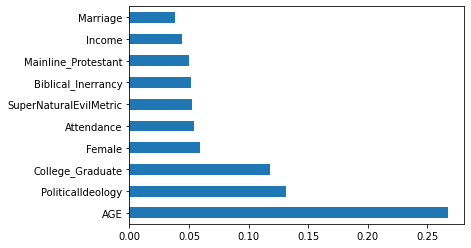

In [164]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

Returns the mean accuracy on the given test data and labels. 

In [165]:
clf.score(X,y,sample_weight=None)

0.9058823529411765

As for the ban of semi-auto guns, we can see that Age, Political Ideology and having a college degree are the most relavant variables since their importances are greater than the others. That means that these categories are more likely to support this ban. </br>
As for the score, it is very satisfying.

We are going to follow the same procedure for the rest of the bans.

##### High-Capacity Magazine Ban

In [166]:
y, X = dmatrices(highcapacity, new_dataset, return_type='dataframe')

In [167]:
clf = DecisionTreeClassifier(max_depth=6,random_state=0)
clf.fit(X,y)
importances(X.columns, clf.feature_importances_)

,importance
AGE,0.231813
PoliticalIdeology,0.201326
College_Graduate,0.123231
SuperNaturalEvilMetric,0.075278
Evangelical_Protestant,0.054874
HS,0.051413
Income,0.048477
Biblical_Inerrancy,0.044540
Black,0.040344
Female,0.040158


<AxesSubplot:>

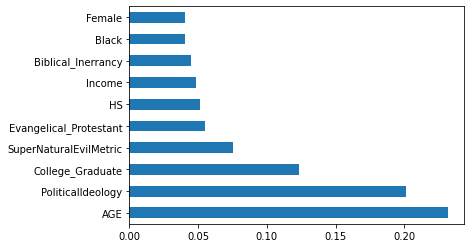

In [168]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

In [169]:
clf.score(X,y,sample_weight=None)

0.9005847953216374

As for the High-Capacity Magazine Ban, we can see that Age, Political Ideology and having a college degree are the most relavant variables since their importances are greater than the others. That means that these categories are more likely to support this ban. We have to mention that belief in Supernatural Evil has a significant supporting role in this ban. 
As for the score, it is satisfying.

##### Cilivian Hand Gun Possession Ban

In [170]:
y, X = dmatrices(handguns, new_dataset, return_type='dataframe')

In [171]:
clf = DecisionTreeClassifier(max_depth=6,random_state=0)
clf.fit(X,y)
importances(X.columns, clf.feature_importances_)

,importance
AGE,0.200107
Income,0.113791
PoliticalIdeology,0.104260
ChildrenUnder18,0.085379
Attendance,0.082220
SuperNaturalEvilMetric,0.068134
HS,0.056747
Other[0],0.056629
Black,0.041593
Catholic,0.037831


<AxesSubplot:>

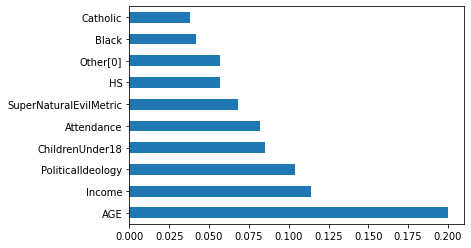

In [172]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

In [173]:
clf.score(X,y,sample_weight=None)

0.9415204678362573

As for Cilivian Hand Gun Possession Ban, we can see that Income and Age are the most relavant variables since their importances are greater than the others. That means that these categories are more likely to support this ban. In addition, Political Ideology has a strong relationship with the support of this ban too. 
As for the score, the percentage of accurance is very satisfying.

##### Support for Concealed Carry Laws

In [174]:
y, X = dmatrices(carrylaws, new_dataset, return_type='dataframe')

In [175]:
clf = DecisionTreeClassifier(max_depth=6,random_state=0)
clf.fit(X,y)
importances(X.columns, clf.feature_importances_)

,importance
PoliticalIdeology,0.308292
Income,0.110031
College,0.095969
AGE,0.075618
Marriage,0.065984
Hispanic,0.057186
Catholic,0.052934
HS,0.034127
Other[0],0.027644
Attendance,0.027404


<AxesSubplot:>

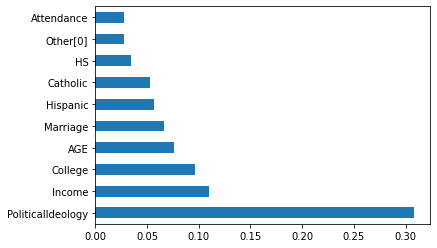

In [176]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

In [177]:
clf.score(X,y,sample_weight=None)

0.8470588235294118

As for the Support for Concealed Carry Laws, we can see that Political Ideology and Income are the most relavant variables since their importances are greater than the others. That means that political ideology has a positive relationship with people who wants for concealed guns to be legal. As for the score, the percentage of accurance is acceptable.

##### More Armed Security at Schools

In [178]:
y, X = dmatrices(securityatscools, new_dataset, return_type='dataframe')

In [179]:
clf = DecisionTreeClassifier(max_depth=6,random_state=0)
clf.fit(X,y)
importances(X.columns, clf.feature_importances_)

,importance
PoliticalIdeology,0.294154
Income,0.132921
AGE,0.118371
SouthStates,0.068839
Evangelical_Protestant,0.057511
Marriage,0.046221
Female,0.045943
ChildrenUnder18,0.043338
Less_Than_HS,0.041544
HS,0.041218


<AxesSubplot:>

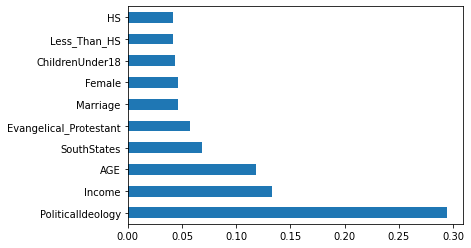

In [180]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

In [181]:
clf.score(X,y,sample_weight=None)

0.8830409356725146

As for More Armed Security at Schools, we can see that Political Ideology and Income are the most relavant variables since their importance is greater than the others. That means that these categories are more likely to support this idea. The score is acceptable.

##### More Teachers / Faculty with Guns

In [182]:
y, X = dmatrices(moreteachers, new_dataset, return_type='dataframe')

In [183]:
clf = DecisionTreeClassifier(max_depth=6,random_state=0)
clf.fit(X,y)
importances(X.columns, clf.feature_importances_)

,importance
AGE,0.297044
PoliticalIdeology,0.216407
Income,0.118590
Attendance,0.100819
SuperNaturalEvilMetric,0.076478
Black,0.049534
ChildrenUnder18,0.032800
Biblical_Inerrancy,0.031178
SouthStates,0.022138
Evangelical_Protestant,0.022138


<AxesSubplot:>

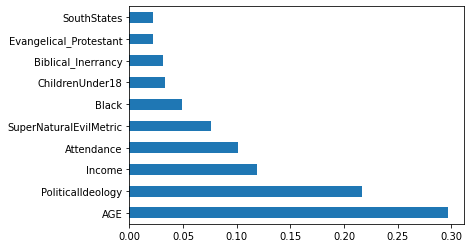

In [184]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

In [185]:
clf.score(X,y,sample_weight=None)

0.935672514619883

As for the idea about More Teachers/Faculty having Guns, we can see that Age and Political Ideology are the most relavant variables since their importance is greater than the others. That means that these categories are more likely to support this idea. The score is satisfactory.

##### Required Gun Safety Programs

In [186]:
y, X = dmatrices(safetyprograms, new_dataset, return_type='dataframe')

In [187]:
clf = DecisionTreeClassifier(max_depth=6,random_state=0)
clf.fit(X,y)
importances(X.columns, clf.feature_importances_)

,importance
AGE,0.439567
Biblical_Literalism,0.186789
Biblical_Inerrancy,0.135618
SuperNaturalEvilMetric,0.117125
Post_Graduate,0.068858
Catholic,0.052042
Intercept,0.000000
Less_Than_HS,0.000000
ChildrenUnder18,0.000000
Marriage,0.000000


<AxesSubplot:>

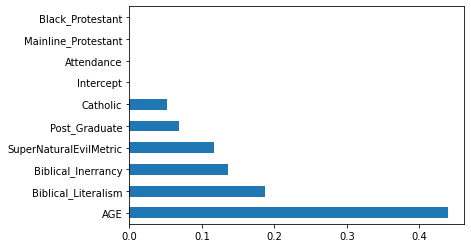

In [188]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

In [189]:
clf.score(X,y,sample_weight=None)

0.9651162790697675

As for the idea about More Gun Safety Programs, we can see that Age has the greatest importance when people who believe in Biblical Inerrancy and Literalism also believe that safety programs are required on schools. As for the score, the percentage of accurance is very satisfactory.

##### Expanded Mental Health Screening

In [190]:
y, X = dmatrices(mentalhealth, new_dataset, return_type='dataframe')

In [191]:
clf = DecisionTreeClassifier(max_depth=6,random_state=42)
clf.fit(X,y)
importances(X.columns, clf.feature_importances_)

,importance
AGE,0.167674
Income,0.155409
Attendance,0.147426
Mainline_Protestant,0.120035
Female,0.117152
College_Graduate,0.095839
PoliticalIdeology,0.067382
Black,0.064691
ChildrenUnder18,0.032019
College,0.026031


<AxesSubplot:>

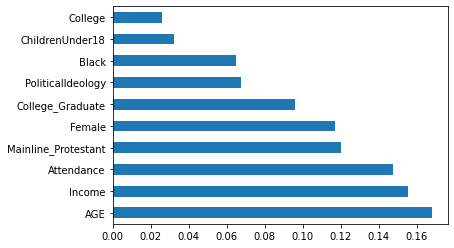

In [192]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

In [193]:
clf.score(X,y,sample_weight=None)

0.9767441860465116

As for Expanded Mental Health Screening, we can see that Age and Income are the most relavant variables since their importances are greater than the others. Attendance has a great value too. As for the score, the percentage of accurance is extremely high.

#### Random Forest

We have to mention that we faced an issue about feature_importances_ and we couldn't use the function we have already created, so we make our comparisons based on score that each model has. Then we found out that we had to use the ravel function. #https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

Importing the libraries we are gonna need

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

We are gonna use the formulas for the bans we have already created in previous tasks as long as dmatrices

##### BanonSemiAutoGuns

In [195]:
y, X = dmatrices(semiauto, new_dataset, return_type='dataframe')

In [196]:
forest = RandomForestClassifier(max_depth=2,random_state=0)
model = forest.fit(X, y.values.ravel())
importances(X.columns, forest.feature_importances_)

,importance
AGE,0.167674
Income,0.155409
Attendance,0.147426
Mainline_Protestant,0.120035
Female,0.117152
College_Graduate,0.095839
PoliticalIdeology,0.067382
Black,0.064691
ChildrenUnder18,0.032019
College,0.026031


In [197]:
y_pred_test = forest.predict(X)
accuracy_score(y, y_pred_test)

0.6941176470588235

The accuracy score is acceptable

##### BanonHighCapacityAmmoClips

In [198]:
y, X = dmatrices(highcapacity, new_dataset, return_type='dataframe')

In [199]:
forest = RandomForestClassifier(max_depth=2,random_state=0)
model = forest.fit(X, y.values.ravel())
importances(X.columns, forest.feature_importances_)

,importance
AGE,0.167674
Income,0.155409
Attendance,0.147426
Mainline_Protestant,0.120035
Female,0.117152
College_Graduate,0.095839
PoliticalIdeology,0.067382
Black,0.064691
ChildrenUnder18,0.032019
College,0.026031


In [200]:
y_pred_test = forest.predict(X)
accuracy_score(y, y_pred_test)

0.7426900584795322

The score for the Banning Civilian Handguns, is low.

##### BanningCivilianHandguns

In [201]:
y, X = dmatrices(handguns, new_dataset, return_type='dataframe')

In [202]:
forest = RandomForestClassifier(max_depth=2,random_state=0)
model = forest.fit(X, y.values.ravel())
importances(X.columns, model.feature_importances_)

,importance
AGE,0.167674
Income,0.155409
Attendance,0.147426
Mainline_Protestant,0.120035
Female,0.117152
College_Graduate,0.095839
PoliticalIdeology,0.067382
Black,0.064691
ChildrenUnder18,0.032019
College,0.026031


In [203]:
y_pred_test = forest.predict(X)
accuracy_score(y, y_pred_test)

0.7602339181286549

Unfortunately the score about the Support for Concealed Carry Laws is low.

##### SupportforConcealedCarryLaws

In [204]:
y, X = dmatrices(carrylaws, new_dataset, return_type='dataframe')

In [205]:
forest = RandomForestClassifier(max_depth=2,random_state=0)
model = forest.fit(X, y.values.ravel())
importances(X.columns, model.feature_importances_)

,importance
AGE,0.167674
Income,0.155409
Attendance,0.147426
Mainline_Protestant,0.120035
Female,0.117152
College_Graduate,0.095839
PoliticalIdeology,0.067382
Black,0.064691
ChildrenUnder18,0.032019
College,0.026031


In [206]:
y_pred_test = forest.predict(X)
accuracy_score(y, y_pred_test)

0.7294117647058823

The score for the option about More Armed Security at Schools is low too.

##### MoreArmedSecurityatSchools

In [207]:
y, X = dmatrices(securityatscools, new_dataset, return_type='dataframe')

In [208]:
forest = RandomForestClassifier(max_depth=2,random_state=0)
model = forest.fit(X, y.values.ravel())
importances(X.columns, model.feature_importances_)

,importance
AGE,0.167674
Income,0.155409
Attendance,0.147426
Mainline_Protestant,0.120035
Female,0.117152
College_Graduate,0.095839
PoliticalIdeology,0.067382
Black,0.064691
ChildrenUnder18,0.032019
College,0.026031


In [209]:
y_pred_test = forest.predict(X)
accuracy_score(y, y_pred_test)

0.7076023391812866

The score for the Ban on High-Capacity Ammo Clips is significantly low too.

##### MoreTeachersFacultyhavingGuns

In [210]:
y, X = dmatrices(moreteachers, new_dataset, return_type='dataframe')

In [211]:
forest = RandomForestClassifier(max_depth=2,random_state=0)
model = forest.fit(X, y.values.ravel())
importances(X.columns, model.feature_importances_)

,importance
AGE,0.167674
Income,0.155409
Attendance,0.147426
Mainline_Protestant,0.120035
Female,0.117152
College_Graduate,0.095839
PoliticalIdeology,0.067382
Black,0.064691
ChildrenUnder18,0.032019
College,0.026031


In [212]:
y_pred_test = forest.predict(X)
accuracy_score(y, y_pred_test)

0.7134502923976608

The score for More Teachers/Faculty having Guns is a low.

##### MoreGunSafetyPrograms

In [213]:
y, X = dmatrices(safetyprograms, new_dataset, return_type='dataframe')

In [214]:
forest = RandomForestClassifier(max_depth=2,random_state=0)
model = forest.fit(X, y.values.ravel())
importances(X.columns, model.feature_importances_)

,importance
AGE,0.167674
Income,0.155409
Attendance,0.147426
Mainline_Protestant,0.120035
Female,0.117152
College_Graduate,0.095839
PoliticalIdeology,0.067382
Black,0.064691
ChildrenUnder18,0.032019
College,0.026031


In [215]:
y_pred_test = forest.predict(X)
accuracy_score(y, y_pred_test)

0.9534883720930233

The score about More Gun Safety Programs is satisfying. 

##### ExpandedMentalHealthScreening

In [216]:
y, X = dmatrices(mentalhealth, new_dataset, return_type='dataframe')

In [217]:
forest = RandomForestClassifier(max_depth=2,random_state=0)
model = forest.fit(X, y.values.ravel())
importances(X.columns, model.feature_importances_)

,importance
AGE,0.167674
Income,0.155409
Attendance,0.147426
Mainline_Protestant,0.120035
Female,0.117152
College_Graduate,0.095839
PoliticalIdeology,0.067382
Black,0.064691
ChildrenUnder18,0.032019
College,0.026031


In [218]:
model.score(X,y,sample_weight=None)

0.8895348837209303

The last score about Expanded Mental Health Screening is acceptable.

### Final Choice
As it proved, Decision Trees are more suitable to be used for our dataset because the scores that this predictor offered, were better than any other algorithm. 

## Conclusion...
In conclusion, in this assignment we had the chance to learn that the people who believe in supernatural evil are more likely to hold pro-gun views. These people consider Gun ownership as a battle between “good and evil,” and “belief in supernatural evil is bound up in policy attitudes that protect or expand gun rights.” </br>
However religious people are not the only ones who are against gun-policies. Our research proved that being educated is not an obstacle if you want to support laws for concealed weapons. In addition, Political Ideology or the Income are significant factors for a rise in pro-gun views. Moreover, biblical literalism has a very significant role in views like these.</br>
In our opinion, the most important detail that have to be mentioned is that gun sales have risen during the pandemic. This fact implies that violence rised during COVID-19 and we know that we cannot kill the virus with a gun. We also know that COVID-19 does not infect only religious people or the ones who believe in Satan - unless they are not getting vaccinated or do not keep social distances🤔. And the problem continues to get worse. </br>
While we were trying to complete this assignment, we were wondering why people want guns in the first place. Some say for protection or for hunting. We disagree with that. Having a gun makes you ready to kill at any time,regardless if your life is in danger, an animal just crossed your path or your job required for you to be armied. And we will not put suicide in the equation. As a wise man wrote "The gun you trust against your fears is itself the thing you should fear."
Source: https://www.theatlantic.com/ideas/archive/2019/08/gun-ownership-new-era/595588/